<a href="https://colab.research.google.com/github/agpenamx/datascience/blob/main/Data_Science_Capstone_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpaceX  Falcon 9 first stage Landing Prediction**
## IBM DATA SCIENCE PROFESSIONAL CERTIFICATE
*Capstone Project (September 23, 2024)*


In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Install PyArrow for fufture Pandas Version

In [1]:
#!pip install pyarrow
#%pip install pyarrow
#pip install pyarrow
# import pyarrow as pa

## Importart Note for Pandas 3.0 and PyArrow

The warning indicates that PyArrow will become a required dependency in future versions of pandas (version 3.0 and above). Not having PyArrow installed may cause compatibility issues later on.

## Import Libraries and Define Auxiliary Functions

In [2]:
#import pyarrow as pa
import requests
import numpy as np
import datetime
import warnings

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Now import pandas
import pandas as pd

# Setting display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Step 1: Retrieve SpaceX Launch Data from the API

In [3]:
#Define API Endpoint
spacex_url = "https://api.spacexdata.com/v4/launches/past"

In [4]:
# Send a GET request to the API
response = requests.get(spacex_url)

# Check if the request was successful
if response.status_code == 200:
    print("Data retrieval was successful!")
    # Parse the response content as JSON
    data = response.json()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data retrieval was successful!


EXPLANATION:
1. requests.get(spacex_url): Sends an HTTP GET request to the specified URL.
2. response.status_code: Checks the HTTP status code of the response. A status code of 200 means the request was successful.
3. response.json(): Parses the response content as JSON, converting it into a Python data structure (usually a list or dictionary).

## Step 2: Convert JSON Data into Pandas Data Frame

In [5]:
# Convert the JSON data into a pandas DataFrame
df = pd.json_normalize(data)

EXPLANATION:
1. pd.json_normalize(): Flattens semi-structured JSON data into a flat table.
2. The resulting DataFrame df contains data about all past SpaceX launches.

## Step 3: Explore the Data Frame (Understand the Data)

In [6]:
# df.head()

In [7]:
# df.info()

## Step 4: Extract Relevant Data using Helper Functions

### Substeps:
4.1 Initialize Lists to Store Extracted Data
    Before defining the helper functions, we’ll create empty lists to store the extracted data.

4.2 Define Helper Functions
    Note: Since we’ll be making multiple API calls within loops, it’s good practice to be mindful of potential API rate limits. However, for the SpaceX API, this is generally not an issue.
    Helper functions: getBoosterVersion(data), getLaunchSite(data), getPayloadData(data), getCoreData(data)

4.3 Execute Helper Functions
    Now that we’ve defined the helper functions, we’ll execute them to populate our lists.

In [8]:
# 4.1 Lists to store data
BoosterVersion = []
LaunchSite = []
Longitude = []
Latitude = []
PayloadMass = []
Orbit = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []

### 4.2 Define Helper Functions
 Note: Since we’ll be making multiple API calls within loops, it’s good practice to be mindful of potential API rate limits.
 However, for the SpaceX API, this is generally not an issue.

In [9]:
# Get Booster Version "Rocket" Features, rocket_id
def getBoosterVersion(data):
    for rocket_id in data['rocket']:
        if rocket_id:
            response = requests.get(f"https://api.spacexdata.com/v4/rockets/{rocket_id}")
            if response.status_code == 200:
                rocket_info = response.json()
                BoosterVersion.append(rocket_info['name'])
            else:
                BoosterVersion.append(None)
        else:
            BoosterVersion.append(None)

#	•	For each rocket_id in the ‘rocket’ column, we make an API call to get the rocket details.
#	•	We extract the ‘name’ of the rocket, which is the booster version.

In [10]:
# Get LaunchSite Features: name, longitude and latitude
def getLaunchSite(data):
    for launchpad_id in data['launchpad']:
        if launchpad_id:
            response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launchpad_id}")
            if response.status_code == 200:
                launchpad_info = response.json()
                LaunchSite.append(launchpad_info['name'])
                Longitude.append(launchpad_info['longitude'])
                Latitude.append(launchpad_info['latitude'])
            else:
                LaunchSite.append(None)
                Longitude.append(None)
                Latitude.append(None)
        else:
            LaunchSite.append(None)
            Longitude.append(None)
            Latitude.append(None)

# 	•	For each launchpad_id in the ‘launchpad’ column, we retrieve the launch site name and its geographical coordinates.

In [11]:
# Get the payload data: mass_kg, orbit
def getPayloadData(data):
    for payload_list in data['payloads']:
        payload_id = payload_list[0]  # Assuming the first payload in the list
        if payload_id:
            response = requests.get(f"https://api.spacexdata.com/v4/payloads/{payload_id}")
            if response.status_code == 200:
                payload_info = response.json()
                PayloadMass.append(payload_info['mass_kg'])
                Orbit.append(payload_info['orbit'])
            else:
                PayloadMass.append(None)
                Orbit.append(None)
        else:
            PayloadMass.append(None)
            Orbit.append(None)

# 	•	For each list of payload_ids, we take the first one and retrieve its mass and orbit.
#	•	Note: Some launches may have multiple payloads; adjust accordingly if needed.

In [12]:
# Get Core Data Block, reuse_count, serial and also landing_success, flight, grid fins, reused, legs, landpad
def getCoreData(data):
    for core_list in data['cores']:
        core = core_list  # 'cores' is a list of dictionaries
        if core[0]['core']:
            core_id = core[0]['core']
            response = requests.get(f"https://api.spacexdata.com/v4/cores/{core_id}")
            if response.status_code == 200:
                core_info = response.json()
                Block.append(core_info.get('block'))
                ReusedCount.append(core_info.get('reuse_count'))
                Serial.append(core_info.get('serial'))
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)

        # Other core details
        Outcome.append(f"{core[0].get('landing_success')} {core[0].get('landing_type')}")
        Flights.append(core[0].get('flight'))
        GridFins.append(core[0].get('gridfins'))
        Reused.append(core[0].get('reused'))
        Legs.append(core[0].get('legs'))
        LandingPad.append(core[0].get('landpad'))

#	•	For each core in ‘cores’, we extract information about the core’s performance and landing outcome.
#	•	We handle cases where data might be missing by using .get() method and defaulting to None.

### 4.3 Execute Helper Functions
Now that we’ve defined the helper functions, we’ll execute them to populate our lists.

In [13]:
# Get Booster Version
getBoosterVersion(df)

# Get Launch Site data
getLaunchSite(df)

# Get Payload Data
getPayloadData(df)

# Get Core Data
getCoreData(df)

#Note: This process might take some time due to the multiple API calls.

## Step 5: Add Extracted Data to the DataFrame
    We align the data in our lists with the DataFrame rows by adding them as new columns.

In [14]:
# Add new columns to the DataFrame
df['BoosterVersion'] = BoosterVersion
df['LaunchSite'] = LaunchSite
df['LaunchSite_Lon'] = Longitude
df['LaunchSite_Lat'] = Latitude
df['PayloadMass'] = PayloadMass
df['Orbit'] = Orbit
df['Outcome'] = Outcome
df['Flights'] = Flights
df['GridFins'] = GridFins
df['Reused'] = Reused
df['Legs'] = Legs
df['LandingPad'] = LandingPad
df['Block'] = Block
df['ReusedCount'] = ReusedCount
df['Serial'] = Serial

## NOTE: DEALING WITH ISSUES:
####	•	Length of values (561): The list BoosterVersion has 561 elements.
####	•	Length of index (187): Your DataFrame df has 187 rows.

#### TO SHOW PROGRESS BARS SINCE THESE LOOPS CAN TAKE TIME

from tqdm import tqdm

def getBoosterVersion(data):
    for rocket_id in tqdm(data['rocket']):
        # Rest of the code... wherever necessary if that's the case for other projects

In [15]:
# Check the length of dataframes
print(f"Length of DataFrame: {len(df)}")
print(f"Length of BoosterVersion list: {len(BoosterVersion)}")

Length of DataFrame: 187
Length of BoosterVersion list: 187


In [16]:
print(f"Length of LaunchSite list: {len(LaunchSite)}")
print(f"Length of PayloadMass list: {len(PayloadMass)}")
print(f"Length of Orbit list: {len(Orbit)}")
print(f"Length of Outcome list: {len(Outcome)}")
print(f"Length of Flights list: {len(Flights)}")
print(f"Length of GridFins list: {len(GridFins)}")
print(f"Length of Reused list: {len(Reused)}")
print(f"Length of Legs list: {len(Legs)}")
print(f"Length of LandingPad list: {len(LandingPad)}")
print(f"Length of Block list: {len(Block)}")
print(f"Length of ReusedCount list: {len(ReusedCount)}")
print(f"Length of Serial list: {len(Serial)}")

Length of LaunchSite list: 187
Length of PayloadMass list: 187
Length of Orbit list: 187
Length of Outcome list: 187
Length of Flights list: 187
Length of GridFins list: 187
Length of Reused list: 187
Length of Legs list: 187
Length of LandingPad list: 187
Length of Block list: 187
Length of ReusedCount list: 187
Length of Serial list: 187


#### RESTART THE LISTS
Before running your helper functions, make sure to reset all your lists to be empty.

# Reset lists
    BoosterVersion = []
    LaunchSite = []
    Longitude = []
    Latitude = []
    PayloadMass = []
    Orbit = []
    Outcome = []
    Flights = []
    GridFins = []
    Reused = []
    Legs = []
    LandingPad = []
    Block = []
    ReusedCount = []
    Serial = []

### IMPORTANT NOTES ON FEATURE SELECTION (BEST PRACTICES - PROMPT WITH OPEN AI 1.0
That's an excellent question! Understanding why specific features are selected as potential predictors is crucial in building an effective predictive model. Let's delve into why we chose those particular lists (variables) and what considerations you should keep in mind during these steps.

---

### **Why These Lists Were Selected as Potential Predictors**

The goal of your project is to predict whether the Falcon 9 first stage will land successfully. To build a predictive model, you need features (variables) that are likely to influence the landing outcome. The lists you've extracted correspond to these features. Here's why each was selected:

#### **1. BoosterVersion**

- **Reason for Selection**: Different booster versions may have varying designs, technologies, and reliability levels. Newer versions might incorporate improvements that increase the likelihood of a successful landing.
- **Potential Impact**: Captures the evolution of technology and its effect on landing success.

#### **2. LaunchSite**

- **Reason for Selection**: The geographical location can influence launch and landing dynamics due to environmental conditions like weather, atmospheric pressure, and proximity to landing zones.
- **Potential Impact**: Helps account for site-specific factors affecting landings.

#### **3. Longitude and Latitude**

- **Reason for Selection**: Provides precise geographical coordinates of the launch site, which can be used to analyze environmental and geographical influences.
- **Potential Impact**: Enables spatial analysis and consideration of geographical challenges.

#### **4. PayloadMass**

- **Reason for Selection**: The mass of the payload affects the rocket's performance, fuel consumption, and trajectory, all of which can influence landing success.
- **Potential Impact**: Directly impacts the rocket's dynamics during ascent and descent.

#### **5. Orbit**

- **Reason for Selection**: Different orbits require different trajectories and energy expenditures, affecting the landing procedure.
- **Potential Impact**: Helps understand how mission profiles influence landing outcomes.

#### **6. Outcome == TARGET VARIABLE AND INDEPENDENT VARIABLE Y**

- **Reason for Selection**: Indicates the success or failure of the landing, which is your target variable.
- **Potential Impact**: Essential for supervised learning, where the model learns from known outcomes.

#### **7. Flights**

- **Reason for Selection**: Number of times the core has been flown. Repeated use may lead to wear and tear or, conversely, demonstrate reliability.
- **Potential Impact**: Provides insight into the durability and reliability of rocket cores.

#### **8. GridFins**

- **Reason for Selection**: Grid fins are aerodynamic control surfaces used during re-entry and landing.
- **Potential Impact**: Presence of grid fins may improve control and increase landing success.

#### **9. Reused**

- **Reason for Selection**: Indicates whether the core has been previously used.
- **Potential Impact**: Helps assess the impact of reusability on performance.

#### **10. Legs**

- **Reason for Selection**: Landing legs are crucial for a soft landing.
- **Potential Impact**: Their presence is likely correlated with landing success.

#### **11. LandingPad**

- **Reason for Selection**: Different landing pads might have varying equipment and conditions.
- **Potential Impact**: May reveal if certain pads have higher success rates.

#### **12. Block**

- **Reason for Selection**: Represents the version of the rocket's core.
- **Potential Impact**: Newer blocks might include design improvements affecting success rates.

#### **13. ReusedCount**

- **Reason for Selection**: Number of times a core has been reused.
- **Potential Impact**: Helps analyze the effect of reuse frequency on landing success.

#### **14. Serial**

- **Reason for Selection**: Unique identifier for each core.
- **Potential Impact**: Can be used to track performance of specific cores, though not typically used as a predictor due to high cardinality.

---

### **Considerations When Selecting Features and Doing These Steps**

When collecting and preparing your data, it's important to consider the following:

#### **1. Relevance to the Target Variable**

- **What to Consider**: Choose features that logically and theoretically could influence the landing outcome.
- **Action**: Use domain knowledge to select variables that are expected to have an impact.

#### **2. Data Quality and Completeness**

- **What to Consider**: Ensure the data for each feature is accurate, consistent, and has minimal missing values.
- **Action**: Check for missing or anomalous values and decide on strategies to handle them (e.g., imputation, removal).

#### **3. Feature Variability**

- **What to Consider**: Features should have enough variability to be informative.
- **Action**: Avoid features with little to no variation across observations, as they provide limited predictive power.

#### **4. Avoid Multicollinearity**

- **What to Consider**: Highly correlated features can distort the model's understanding of feature importance.
- **Action**: Use correlation matrices to identify and potentially remove or combine highly correlated predictors.

#### **5. Data Type and Encoding**

- **What to Consider**: Ensure that categorical variables are properly encoded (e.g., one-hot encoding) and numerical variables are in the correct format.
- **Action**: Convert categorical variables into numerical representations suitable for modeling algorithms.

#### **6. Feature Engineering**

- **What to Consider**: Create new features that might capture important relationships (e.g., combining related features).
- **Action**: Consider deriving new variables, such as "TotalReused" by combining "Reused" and "ReusedCount."

#### **7. Overfitting Risk**

- **What to Consider**: Including too many features, especially those with high cardinality or irrelevant information, can lead to overfitting.
- **Action**: Use feature selection techniques and cross-validation to ensure your model generalizes well.

#### **8. Data Leakage**

- **What to Consider**: Avoid using features that contain information not available at the time of prediction.
- **Action**: Ensure that all predictors are available before the landing outcome is known.

#### **9. Ethical and Legal Considerations**

- **What to Consider**: Ensure you're complying with data usage policies and respecting privacy if any personal data is involved.
- **Action**: Review data source terms and anonymize data if necessary.

---

### **Best Practices During These Steps**

#### **Understand the Domain**

- **Explanation**: Leverage your understanding of rocket launches and aerospace engineering to inform feature selection.
- **Example**: Knowing that payload mass affects fuel requirements helps justify including "PayloadMass" as a predictor.

#### **Exploratory Data Analysis (EDA)**

- **Explanation**: Before modeling, perform EDA to understand the distributions, relationships, and potential issues in your data.
- **Action**: Create visualizations (e.g., histograms, scatter plots) and compute statistics to uncover insights.

#### **Document Your Process**

- **Explanation**: Keep detailed notes on data sources, decisions made, and reasons for selecting or discarding features.
- **Action**: This documentation is valuable for transparency and future reference.

#### **Validate Assumptions**

- **Explanation**: Test any assumptions you make about the data or relationships between variables.
- **Action**: Use statistical tests or consult subject matter experts to confirm your assumptions.

#### **Iterative Approach**

- **Explanation**: Feature selection is often an iterative process that involves testing and refining.
- **Action**: Be prepared to revisit and adjust your feature set based on model performance and validation results.

---

### **Summary**

- **Feature Selection Rationale**: The selected lists are chosen because they represent factors that potentially influence the success of Falcon 9 first-stage landings.
- **Considerations**:
  - **Relevance and Predictive Power**: Focus on features that logically affect the outcome.
  - **Data Quality**: Ensure data is accurate and handle missing values appropriately.
  - **Model Performance**: Be cautious of overfitting and multicollinearity.
  - **Ethics and Compliance**: Respect data usage policies and ethical considerations.

By carefully selecting and preparing your features with these considerations in mind, you enhance the likelihood of building a robust and effective predictive model. Remember, the key is not just to collect data but to understand and thoughtfully incorporate it into your analysis.

---

### **Next Steps**

As you proceed:

- **Perform EDA**: Use the selected features to explore the data and identify patterns or correlations.
- **Feature Engineering**: Consider creating new features or transforming existing ones to improve model performance.
- **Model Building**: Use the refined set of features to train your machine learning models.
- **Evaluation**: Assess model performance using appropriate metrics and validate using cross-validation techniques.


## Step 6: Clean and Organize de Data Frame:
1. **Select Columns of Interest**
2. **Apply Filters if applicable**, * Prior to dealing with missing values or data type conversions.
---


#### **Why Filtering for Falcon 9 First is Preferable**

*Efficiency*

	•	Avoid Unnecessary Computation: By filtering the dataset to include only Falcon 9 launches before handling missing values, you reduce the amount of data you need to process. This saves time and computational resources.

*Relevance of Data*

	•	Contextual Accuracy: Calculating statistics (like mean or mode) for imputing missing values based solely on the Falcon 9 data ensures that these values are representative of the subset you’re analyzing.

*Targeted Data Cleaning*

	•	Specific Handling: Different rocket versions may have different characteristics and patterns of missing data. By focusing on Falcon 9, you can tailor your data cleaning strategies to this specific subset.

---

3. **Rename Columns (Features) for Clarity**
4. **Convert Data Types and Handle Missing Values**
   
   *4.1 Convert Date Column to Datetime*

   *4.2 Handle Missing Values*


In [17]:
# Select columns of interest
df = df[['flight_number', 'name', 'date_utc', 'BoosterVersion', 'LaunchSite', 'LaunchSite_Lon', 'LaunchSite_Lat',
         'PayloadMass', 'Orbit', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
         'Block', 'ReusedCount', 'Serial']]

# 	•	flight_number: The flight number of the launch.
#	•	name: The mission name.
#	•	date_utc: The launch date in UTC.
#	•	Other columns are the ones we added.

In [18]:
df.head()

,flight_number,name,date_utc,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,FalconSat,2006-03-24T22:30:00.000Z,Falcon 1,Kwajalein Atoll,167.743129,9.047721,20.0,LEO,None None,1,False,False,False,None,NaN,0,Merlin1A
1,2,DemoSat,2007-03-21T01:10:00.000Z,Falcon 1,Kwajalein Atoll,167.743129,9.047721,NaN,LEO,None None,1,False,False,False,None,NaN,0,Merlin2A
2,3,Trailblazer,2008-08-03T03:34:00.000Z,Falcon 1,Kwajalein Atoll,167.743129,9.047721,NaN,LEO,None None,1,False,False,False,None,NaN,0,Merlin1C
3,4,RatSat,2008-09-28T23:15:00.000Z,Falcon 1,Kwajalein Atoll,167.743129,9.047721,165.0,LEO,None None,1,False,False,False,None,NaN,0,Merlin2C
4,5,RazakSat,2009-07-13T03:35:00.000Z,Falcon 1,Kwajalein Atoll,167.743129,9.047721,200.0,LEO,None None,1,False,False,False,None,NaN,0,Merlin3C


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_number   187 non-null    int64  
 1   name            187 non-null    object 
 2   date_utc        187 non-null    object 
 3   BoosterVersion  187 non-null    object 
 4   LaunchSite      187 non-null    object 
 5   LaunchSite_Lon  187 non-null    float64
 6   LaunchSite_Lat  187 non-null    float64
 7   PayloadMass     162 non-null    float64
 8   Orbit           186 non-null    object 
 9   Outcome         187 non-null    object 
 10  Flights         187 non-null    int64  
 11  GridFins        187 non-null    bool   
 12  Reused          187 non-null    bool   
 13  Legs            187 non-null    bool   
 14  LandingPad      151 non-null    object 
 15  Block           182 non-null    float64
 16  ReusedCount     187 non-null    int64  
 17  Serial          187 non-null    obj

In [20]:
# Rename columns for consistency

df.rename(columns={'flight_number': 'FlightNumber', 'name': 'MissionName', 'date_utc': 'LaunchDate'}, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    187 non-null    int64  
 1   MissionName     187 non-null    object 
 2   LaunchDate      187 non-null    object 
 3   BoosterVersion  187 non-null    object 
 4   LaunchSite      187 non-null    object 
 5   LaunchSite_Lon  187 non-null    float64
 6   LaunchSite_Lat  187 non-null    float64
 7   PayloadMass     162 non-null    float64
 8   Orbit           186 non-null    object 
 9   Outcome         187 non-null    object 
 10  Flights         187 non-null    int64  
 11  GridFins        187 non-null    bool   
 12  Reused          187 non-null    bool   
 13  Legs            187 non-null    bool   
 14  LandingPad      151 non-null    object 
 15  Block           182 non-null    float64
 16  ReusedCount     187 non-null    int64  
 17  Serial          187 non-null    obj

In [22]:
# Convert 'LaunchDate' to datetime format
df['LaunchDate'] = pd.to_datetime(df['LaunchDate'])

In [23]:
df['LaunchDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 187 entries, 0 to 186
Series name: LaunchDate
Non-Null Count  Dtype              
--------------  -----              
187 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 1.6 KB


In [24]:
#df.head()

### Filtering Data for Falcon 9 Only (as per stakeholders request)

In [25]:
# Filter the DataFrame to include only 'Falcon 9' launches
df_falcon9 = df[df['BoosterVersion'] == 'Falcon 9'].reset_index(drop=True)

#	•	df[df['BoosterVersion'] == 'Falcon 9']: Selects rows where the ‘BoosterVersion’ is ‘Falcon 9’.
#	•	reset_index(drop=True): Resets the index of the filtered DataFrame.


In [26]:
# Check for missing values
print(df.isnull().sum())

# Optionally, you can fill missing values or drop rows with missing critical data
# For example, fill missing PayloadMass with 0
# df['PayloadMass'].fillna(0, inplace=True)

# 	•	We need to ensure that our data is clean and ready for analysis.
#	•	Decide how to handle missing values based on the importance of the data.

FlightNumber       0
MissionName        0
LaunchDate         0
BoosterVersion     0
LaunchSite         0
LaunchSite_Lon     0
LaunchSite_Lat     0
PayloadMass       25
Orbit              1
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        36
Block              5
ReusedCount        0
Serial             0
dtype: int64


In [27]:
# df_falcon9.info()
df_falcon9

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,NaN,LEO,None None,1,False,False,False,None,1.0,0,B0003
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,NaN,LEO,None None,1,False,False,False,None,1.0,0,B0004
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.0,LEO,None None,1,False,False,False,None,1.0,0,B0005
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.0,ISS,None None,1,False,False,False,None,1.0,0,B0006
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.0,ISS,None None,1,False,False,False,None,1.0,0,B0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,183,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,2022-09-05 02:09:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,7,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6,B1052
175,184,Starlink 4-2 (v1.5) & Blue Walker 3,2022-09-11 01:10:00+00:00,Falcon 9,KSC LC 39A,-80.603956,28.608058,13260.0,VLEO,True ASDS,14,True,True,True,5e9e3033383ecb075134e7cd,5.0,13,B1058
176,185,Starlink 4-34 (v1.5),2022-09-17 01:05:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067
177,186,Starlink 4-35 (v1.5),2022-09-24 23:30:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072


In [28]:
# df_falcon9.info()
df_falcon9

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,NaN,LEO,None None,1,False,False,False,None,1.0,0,B0003
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,NaN,LEO,None None,1,False,False,False,None,1.0,0,B0004
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.0,LEO,None None,1,False,False,False,None,1.0,0,B0005
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.0,ISS,None None,1,False,False,False,None,1.0,0,B0006
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.0,ISS,None None,1,False,False,False,None,1.0,0,B0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,183,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,2022-09-05 02:09:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,7,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6,B1052
175,184,Starlink 4-2 (v1.5) & Blue Walker 3,2022-09-11 01:10:00+00:00,Falcon 9,KSC LC 39A,-80.603956,28.608058,13260.0,VLEO,True ASDS,14,True,True,True,5e9e3033383ecb075134e7cd,5.0,13,B1058
176,185,Starlink 4-34 (v1.5),2022-09-17 01:05:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067
177,186,Starlink 4-35 (v1.5),2022-09-24 23:30:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,13260.0,VLEO,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072


In [29]:
# Check for missing values for df_falcon9
print(df_falcon9.isnull().sum())

FlightNumber       0
MissionName        0
LaunchDate         0
BoosterVersion     0
LaunchSite         0
LaunchSite_Lon     0
LaunchSite_Lat     0
PayloadMass       23
Orbit              1
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        31
Block              0
ReusedCount        0
Serial             0
dtype: int64


### Handling Missing Values
Based on our DataFrame, the columns with missing values are:

	•	PayloadMass (23 missing)
	•	Orbit (1 missing)
	•	LandingPad (31 missing)


In [30]:
# Since PayloadMass is numerical we will replace it with mean values

# Calculate the mean of 'PayloadMass', ignoring NaN values
payload_mass_mean = df_falcon9['PayloadMass'].mean()
print(f"Mean Payload Mass: {payload_mass_mean:.2f} kg")

Mean Payload Mass: 8117.57 kg


In [31]:
# Replace NaN values in 'PayloadMass' with the mean
df_falcon9['PayloadMass'].fillna(payload_mass_mean, inplace=True)

### WARNINGS FOR PANDA 3.0 VERSION AND USE IN PLACE METHOD

<ipython-input-71-2f5f862f5595>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PayloadMass'].fillna(payload_mass_mean, inplace=True)
<ipython-input-71-2f5f862f5595>:2: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PayloadMass'].fillna(payload_mass_mean, inplace=True)

In [32]:
# Confirm that 'PayloadMass' has no more missing values
print(f"Missing values in 'PayloadMass': {df_falcon9['PayloadMass'].isnull().sum()}")

Missing values in 'PayloadMass': 0


In [33]:
# Find the mode of 'Orbit' SINCE ITS CATEGORICAL WE FIND WHICH ORBIT OCCURS THE MOST OFTEN
orbit_mode = df_falcon9['Orbit'].mode()[0]
print(f"Most frequent Orbit: {orbit_mode}")

# Replace NaN in 'Orbit' with the mode
df_falcon9['Orbit'].fillna(orbit_mode, inplace=True)

# Confirm that 'Orbit' has no more missing values
print(f"Missing values in 'Orbit': {df_falcon9['Orbit'].isnull().sum()}")

Most frequent Orbit: VLEO
Missing values in 'Orbit': 0


### HANDLING MISSING VALUES ON LAUCH PAD (IMPORTANCE OF KNOWLEDGE OF THE PROJECT)
#### The LandingPad column has 36 missing values. Since not all launches use a landing pad (e.g., some landings are at sea or the core is expended), we can:

	 •	Option 1: Leave the missing values as NaN if they represent meaningful absence.
	 •	Option 2: Fill missing values with a placeholder like 'No Attempt' or 'None'.

FOR THIS EXAMPLE WE WILL LEAVE IT AS NaN REPRESENTING MEANINGFUL ABSENCE SINCE WE DON'T HAVE FURTHER CONFIRMATION, IN REAL SCENARIO WE WOULD NEED TO ASK THE SOURCE OF THE DATA, STAKEHOLDERS, PEERS, SUBJECT MATTER EXPERTS, ETC.

In [34]:
# Verify for missing values for df_falcon9
print(df_falcon9.isnull().sum())

FlightNumber       0
MissionName        0
LaunchDate         0
BoosterVersion     0
LaunchSite         0
LaunchSite_Lon     0
LaunchSite_Lat     0
PayloadMass        0
Orbit              0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        31
Block              0
ReusedCount        0
Serial             0
dtype: int64


In [35]:
df_falcon9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   FlightNumber    179 non-null    int64              
 1   MissionName     179 non-null    object             
 2   LaunchDate      179 non-null    datetime64[ns, UTC]
 3   BoosterVersion  179 non-null    object             
 4   LaunchSite      179 non-null    object             
 5   LaunchSite_Lon  179 non-null    float64            
 6   LaunchSite_Lat  179 non-null    float64            
 7   PayloadMass     179 non-null    float64            
 8   Orbit           179 non-null    object             
 9   Outcome         179 non-null    object             
 10  Flights         179 non-null    int64              
 11  GridFins        179 non-null    bool               
 12  Reused          179 non-null    bool               
 13  Legs            179 non-null    boo

In [36]:
df_falcon9.head(10)

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,None,1.0,0,B0003
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,None,1.0,0,B0004
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,None,1.0,0,B0005
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,None,1.0,0,B0006
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,None,1.0,0,B0007
5,11,CASSIOPE,2013-09-29 16:00:00+00:00,Falcon 9,VAFB SLC 4E,-120.610829,34.632093,500.000000,PO,False Ocean,1,False,False,False,None,1.0,0,B1003
6,12,SES-8,2013-12-03 22:41:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,3170.000000,GTO,None None,1,False,False,False,None,1.0,0,B1004
7,13,Thaicom 6,2014-01-06 18:06:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,3325.000000,GTO,None None,1,False,False,False,None,1.0,0,B1005
8,14,CRS-3,2014-04-18 19:25:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,2296.000000,ISS,True Ocean,1,False,False,True,None,1.0,0,B1006
9,15,OG-2 Mission 1,2014-07-14 15:15:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,1316.000000,LEO,True Ocean,1,False,False,True,None,1.0,0,B1007


In [37]:
# Check for duplicate rows in df_falcon9
duplicate_rows = df_falcon9[df_falcon9.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows if any
if not duplicate_rows.empty:
    print(duplicate_rows)

Number of duplicate rows: 0


### Save the Clean Data Frame into CSV

In [38]:
# Save the DataFrame to a CSV file
df_falcon9.to_csv('dataset_part_1.csv', index=False)
print("Data saved to 'dataset_part_1.csv'")

Data saved to 'dataset_part_1.csv'


## Step 7: Exploratory Data Analysis (EDA) | Data Wrangling

    In this step, we’ll perform exploratory data analysis to understand the data better and uncover any patterns or insights that can inform our predictive modeling.

    **Objective**

    I will perform exploratory data analysis (EDA) to uncover patterns in the SpaceX Falcon 9 launch data and prepare it for modeling. Specifically, we aim to:

	•	Analyze the distribution of launches across different launch sites.
	•	Examine the occurrence of different orbit types.
	•	Investigate the mission outcomes and classify them for supervised learning.
	•	Identify relationships between variables that could inform our predictive models.

---

Difference Between Data Wrangling and Exploratory Data Analysis (EDA)

It’s important to clarify the distinction between Data Wrangling and Exploratory Data Analysis (EDA), as they are related but distinct steps in the data analysis process.

Data Wrangling (Data Cleaning or Preprocessing)

	•	Purpose: Prepare raw data for analysis.
	•	Activities Involved:
	•	Handling Missing Values: Imputing or removing missing data.
	•	Correcting Data Types: Ensuring data types are appropriate (e.g., dates as datetime objects).
	•	Filtering Data: Selecting relevant subsets of data (e.g., filtering for Falcon 9 launches).
	•	Transforming Data: Encoding categorical variables, normalizing numerical variables.
	•	Feature Engineering: Creating new features from existing data.
	•	Outcome: A clean, consistent, and analysis-ready dataset.

Exploratory Data Analysis (EDA)

	•	Purpose: Understand the data’s main characteristics and discover patterns or anomalies.
	•	Activities Involved:
	•	Descriptive Statistics: Calculating mean, median, mode, standard deviation.
	•	Data Visualization: Creating plots like histograms, scatter plots, box plots.
	•	Identifying Relationships: Looking for correlations or associations between variables.
	•	Detecting Outliers: Finding data points that deviate significantly from others.
	•	Outcome: Insights into the data that inform hypotheses and guide further analysis or modeling.

Key Differences

	•	Sequence: Data Wrangling typically precedes EDA. You need clean data to perform accurate EDA.
	•	Focus:
	•	Data Wrangling: Addresses data quality issues.
	•	EDA: Explores and interprets the data to extract meaningful insights.



In [39]:
# Display descriptive statistics
df_falcon9.describe()

,FlightNumber,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Flights,Block,ReusedCount
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,96.927374,-86.847308,29.524813,8117.574038,3.754190,4.145251,5.441341
std,52.999367,14.579913,2.205540,5174.889909,3.290422,1.422578,4.727480
min,6.000000,-120.610829,28.561857,330.000000,1.000000,1.000000,0.000000
25%,50.500000,-80.603956,28.561857,3326.500000,1.000000,3.500000,1.000000
50%,98.000000,-80.577366,28.561857,8117.574038,2.000000,5.000000,5.000000
75%,142.500000,-80.577366,28.608058,13260.000000,5.500000,5.000000,9.000000
max,187.000000,-80.577366,34.632093,15600.000000,14.000000,5.000000,13.000000


In [40]:
%pip install seaborn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset_part_1.csv')

# Display the first few rows
df.head()

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007


In [41]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    179 non-null    int64  
 1   MissionName     179 non-null    object 
 2   LaunchDate      179 non-null    object 
 3   BoosterVersion  179 non-null    object 
 4   LaunchSite      179 non-null    object 
 5   LaunchSite_Lon  179 non-null    float64
 6   LaunchSite_Lat  179 non-null    float64
 7   PayloadMass     179 non-null    float64
 8   Orbit           179 non-null    object 
 9   Outcome         179 non-null    object 
 10  Flights         179 non-null    int64  
 11  GridFins        179 non-null    bool   
 12  Reused          179 non-null    bool   
 13  Legs            179 non-null    bool   
 14  LandingPad      148 non-null    object 
 15  Block           179 non-null    float64
 16  ReusedCount     179 non-null    int64  
 17  Serial          179 non-null    obj

In [42]:
# Check for missing values
df.isnull().sum()

,0
FlightNumber,0
MissionName,0
LaunchDate,0
BoosterVersion,0
LaunchSite,0
LaunchSite_Lon,0
LaunchSite_Lat,0
PayloadMass,0
Orbit,0
Outcome,0


### Number of Launches per Site for Falcon 9
The SpaceX Falcon 9 has launched from several sites. We’ll calculate the number of launches from each site.

In [43]:
# Calculate the number of launches per site
launch_site_counts = df['LaunchSite'].value_counts()
print(launch_site_counts)

LaunchSite
CCSFS SLC 40    99
KSC LC 39A      52
VAFB SLC 4E     28
Name: count, dtype: int64


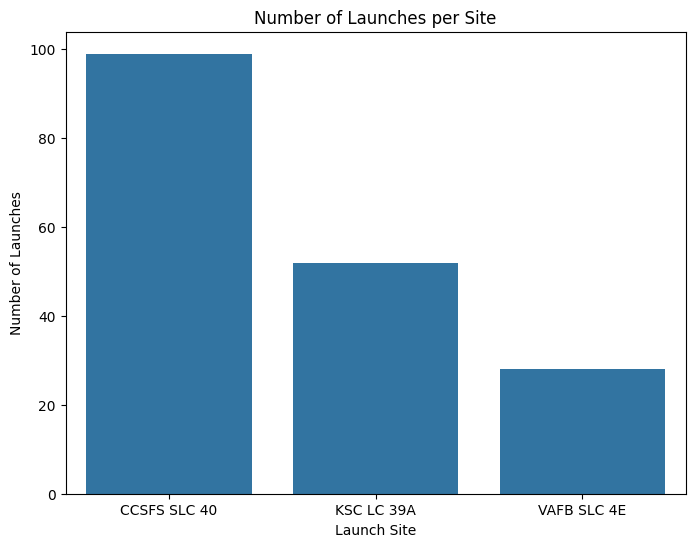

In [44]:
# Plot the number of launches per site
plt.figure(figsize=(8,6))
sns.barplot(x=launch_site_counts.index, y=launch_site_counts.values)
plt.title('Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.show()

### Analysis and Best Practices:

	•	Data Interpretation: The majority of launches occur from CCSFS SLC 40, followed by KSC LC 39A and VAFB SLC 4E.
	•	Best Practice: Visualizing counts helps communicate findings effectively.
	•	Potential Insight: The concentration of launches at specific sites might be due to infrastructure capabilities, geographical advantages, or mission requirements.

### Number and Occurrence of each Orbit
The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .The location of each Launch Is placed in the column LaunchSite

Each launch aims to an dedicated orbit, and here are some common orbit types:

LEO: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO [1].

VLEO: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation[2].

GTO A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website [3] .

SSO (or SO): It is a Sun-synchronous orbit also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time [4] .

ES-L1 :At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth [5] .

HEO A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth [6].

ISS A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada) [7]

MEO Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours [8]

HEO Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) [9]

GEO It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation [10]

PO It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth [11]


In [45]:
# Calculate the number and occurrence of each orbit
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)

Orbit
VLEO     59
GTO      34
ISS      33
LEO      15
PO       14
SSO      12
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: count, dtype: int64


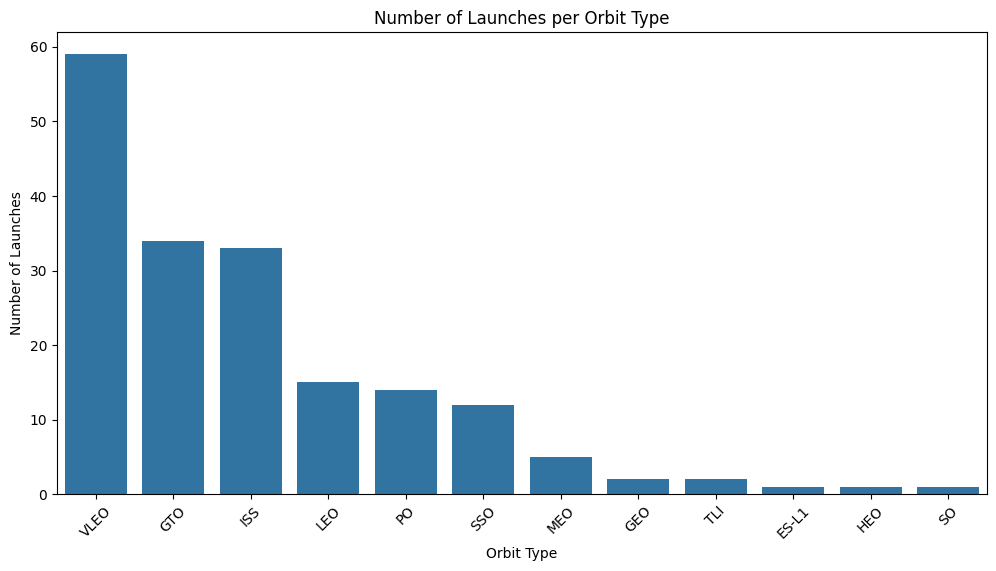

In [46]:
# Plot the occurrence of each orbit
plt.figure(figsize=(12,6))
sns.barplot(x=orbit_counts.index, y=orbit_counts.values)
plt.title('Number of Launches per Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

#### Analysis and Best Practices:

	•	Data Interpretation: The most frequent orbit types are GTO (Geosynchronous Transfer Orbit) and LEO (Low Earth Orbit).
	•	Best Practice: Sorting the plot can improve readability.
	•	Potential Insight: The prevalence of certain orbit types indicates mission focus areas, such as communication satellites (GTO) or Earth observation (LEO).

### Number and Occurrence of Mission Outcomes

    We’ll examine the mission outcomes to understand the success rates and common failure modes.

In [47]:
# Calculate the number and occurrence of each mission outcome
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

Outcome
True ASDS      114
None None       24
True RTLS       23
False ASDS       8
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: count, dtype: int64


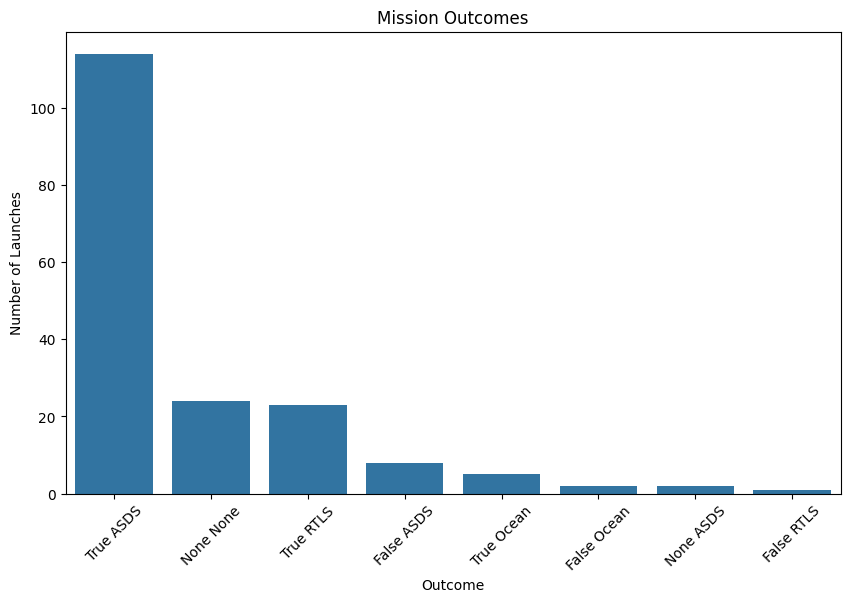

In [48]:
# Plot the occurrence of each mission outcome
plt.figure(figsize=(10,6))
sns.barplot(x=landing_outcomes.index, y=landing_outcomes.values)
plt.title('Mission Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

#### Analysis and Best Practices:

	•	Data Interpretation:
	•	True ASDS (Autonomous Spaceport Drone Ship) is the most common successful outcome.
	•	None None indicates missions where no landing attempt was made.
	•	Failures are denoted by outcomes starting with False.
	•	Best Practice: Understanding outcome categories is crucial for accurate labeling and analysis.
	•	Potential Insight: The high number of successful drone ship landings showcases SpaceX’s proficiency in this recovery method.

### Create Landing Outcome Labels
    To prepare the data for supervised learning, we’ll create a binary classification label indicating success (1) or failure (0) of the first-stage landing.

In [49]:
# Define bad outcomes
bad_outcomes = [
    'False ASDS', 'None None', 'False RTLS', 'False Ocean'
]

In [50]:
# Create a landing outcome label
df['LandingClass'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

# Display the first few rows
df[['Outcome', 'LandingClass']].head(10)

,Outcome,LandingClass
0,None None,0
1,None None,0
2,None None,0
3,None None,0
4,None None,0
5,False Ocean,0
6,None None,0
7,None None,0
8,True Ocean,1
9,True Ocean,1


In [51]:
# Check the distribution of LandingClass
landing_class_counts = df['LandingClass'].value_counts()
print(landing_class_counts)

LandingClass
1    144
0     35
Name: count, dtype: int64


---
### Analysis and Best Practices:

	•	Data Interpretation: Approximately 80.45% of the landings were successful.
	•	Best Practice: Clearly defining labels is essential for supervised learning tasks.
	•	Potential Insight: The binary classification simplifies the outcome variable for modeling.

---

### ADVANCED EXPLORATORY DATA ANALYSIS
    1. CORRELATION ANALYSIS : HEAT MAP
    2. FEATURE RELATIONSHIP ANALYSIS: PAIRPLOT

**CATEGORICAL ANALYSIS:**
    
    3. LANDING SUCCESS BY LAUNCH SITE
    4. LANDING SUCCESS BY ORBIT
    
    

In [52]:
# Select numerical features for correlation
numerical_features = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Convert boolean columns to integers
for col in numerical_features.select_dtypes(include='bool').columns:
    numerical_features[col] = numerical_features[col].astype(int)

# Include 'LandingClass' in the correlation
numerical_features['LandingClass'] = df['LandingClass']

# Compute the correlation matrix
corr_matrix = numerical_features.corr()


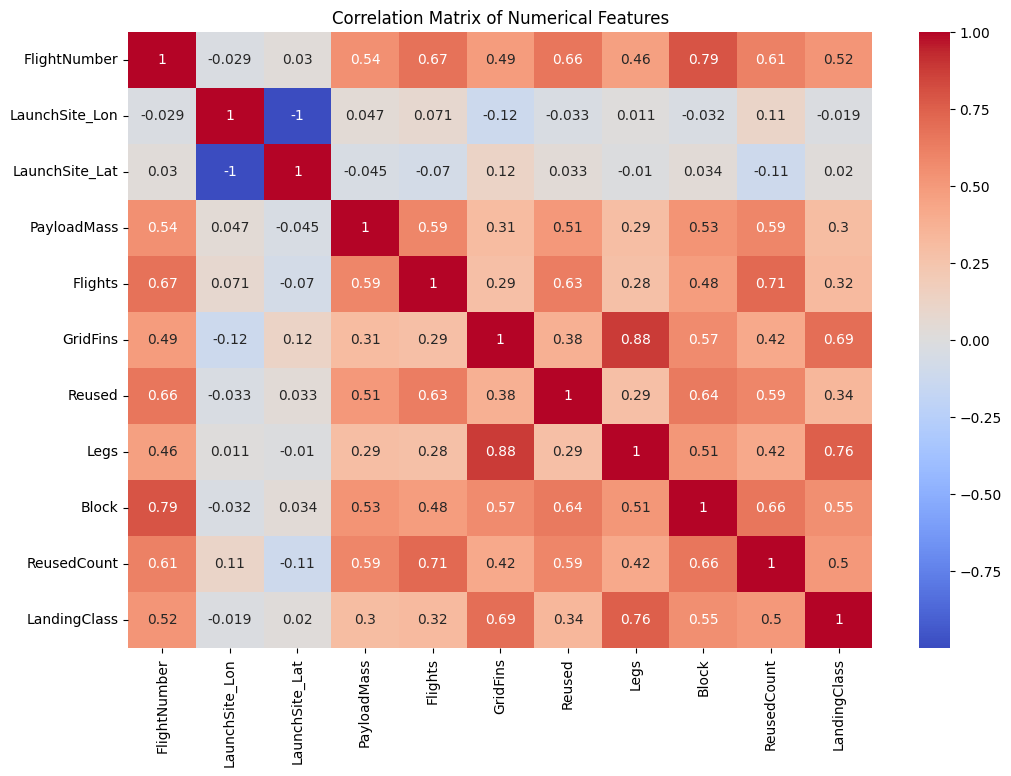

In [53]:
# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Legs (0.76), GridFins (0.69), ReusedCount (0.5) and Block (0.55) have some relationship with Success
    
    Best Practices:
	•	Feature Selection: Correlation analysis helps identify important features for modeling.
	•	Data Transformation: Converting boolean variables to integers enables inclusion in correlation analysis.


### Pair Plot Analysis
To examine pairwise relationships between variables, we’ll use Seaborn’s pairplot.

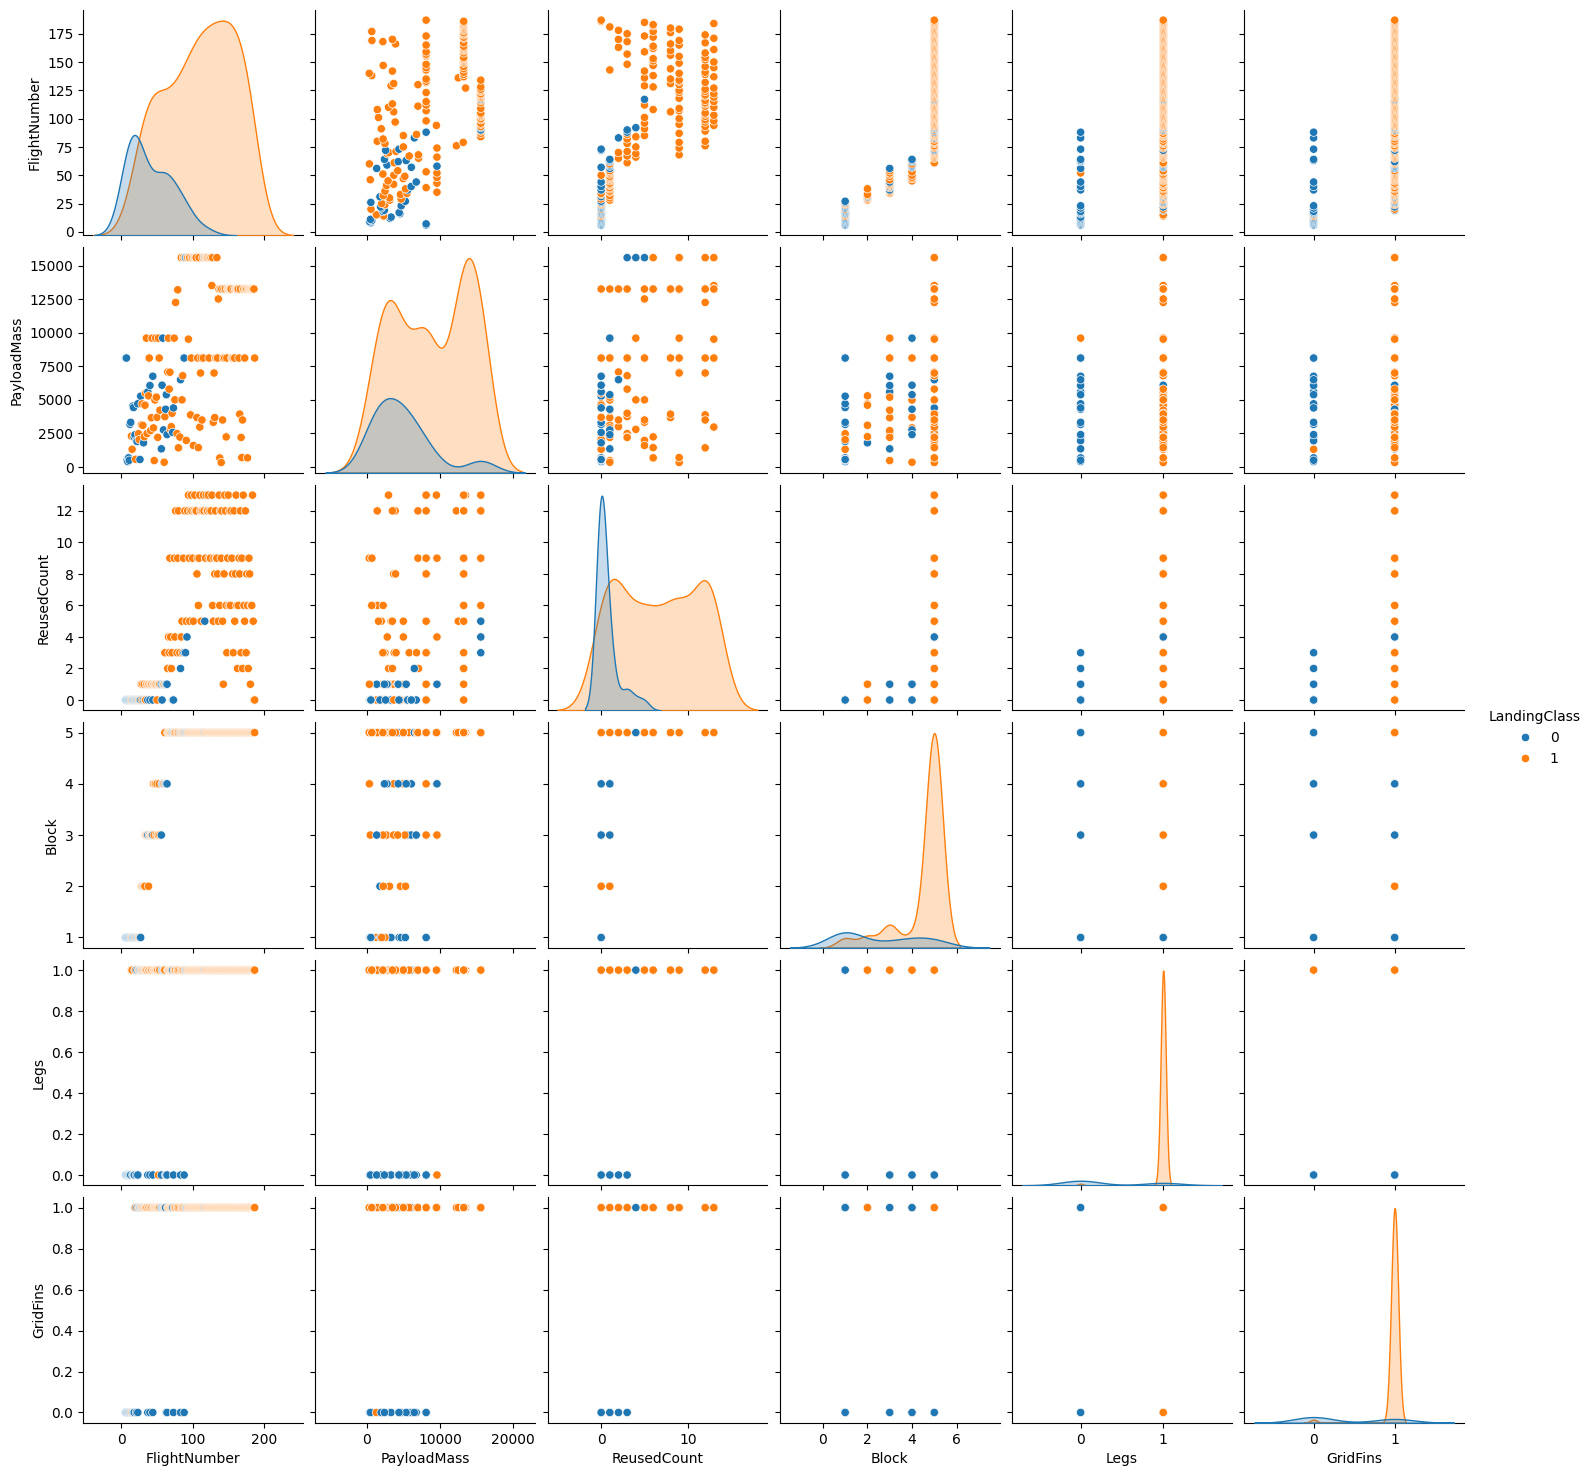

In [54]:
# Create a pairplot
sns.pairplot(
    df,
    vars=['FlightNumber', 'PayloadMass', 'ReusedCount', 'Block', 'Legs', 'GridFins'],
    hue='LandingClass')
plt.show()

#### Analysis:
    1. Payload Mass distribution shows that the higher the mass the more success rate will have.
    2. Higher flight numbers tend to have successful landings. Indicates learning and improvement over time.
    3. ReusedCount versus Landing Class: Higher reuse counts correlate with successful landings. Suggests that cores that have been reused multiple times are reliable.
    

Best Practices:

	•	Visualization: Pairplots provide a comprehensive view of pairwise relationships.
	•	Interpretation: Look for patterns and groupings that distinguish classes.

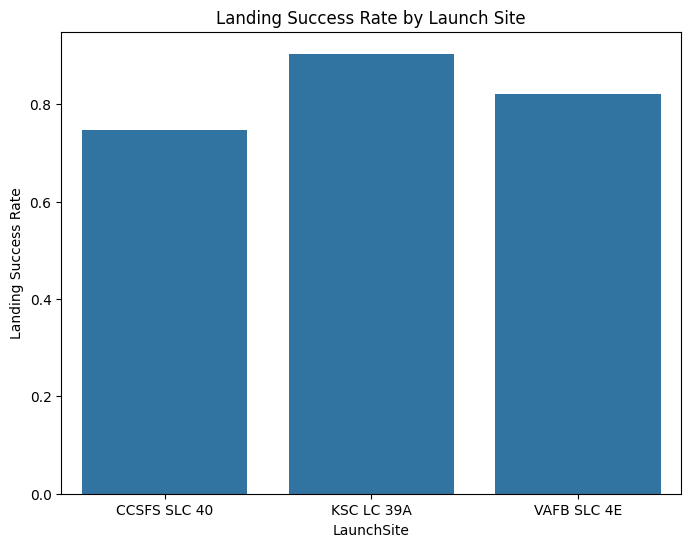

In [55]:
# CATEGORICAL VALUES
# Calculate landing success rate per launch site
site_success = df.groupby('LaunchSite')['LandingClass'].mean().reset_index()

# Plot the success rate
plt.figure(figsize=(8,6))
sns.barplot(x='LaunchSite', y='LandingClass', data=site_success)
plt.title('Landing Success Rate by Launch Site')
plt.ylabel('Landing Success Rate')
plt.show()

Analysis:

    1. KSC LC 39A has the highest landing success rate.
	2. VAFB SLC 4E has the lowest success rate.

Potential Insight:
	•	Site-specific factors may influence landing success.
	•	Could be due to differences in mission profiles or environmental conditions.


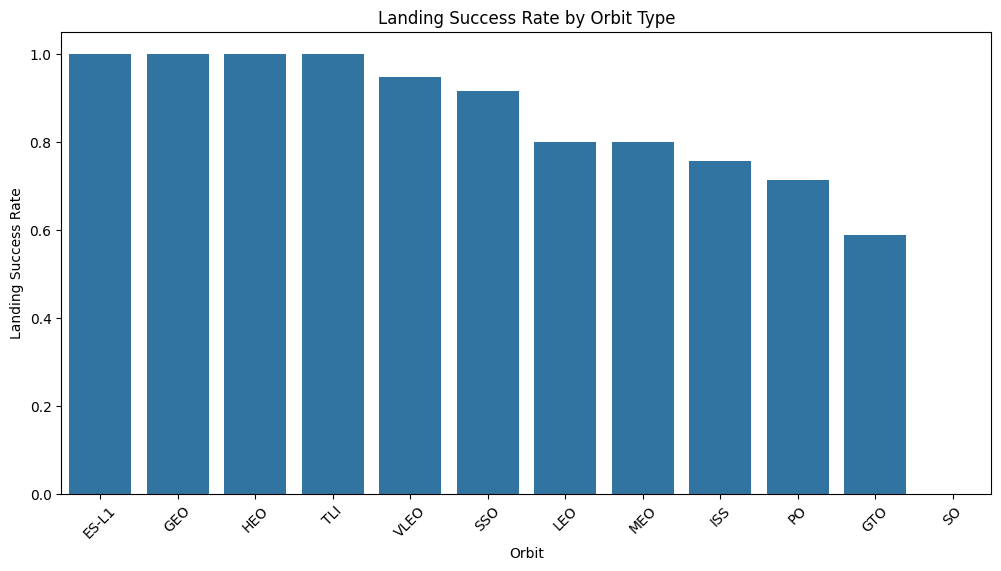

In [56]:
# Calculate landing success rate per orbit
orbit_success = df.groupby('Orbit')['LandingClass'].mean().reset_index()

# Plot the success rate
plt.figure(figsize=(12,6))
sns.barplot(x='Orbit', y='LandingClass', data=orbit_success, order=orbit_success.sort_values('LandingClass', ascending=False)['Orbit'])
plt.title('Landing Success Rate by Orbit Type')
plt.ylabel('Landing Success Rate')
plt.xticks(rotation=45)
plt.show()

Analysis:

    1. Missions to certain orbits have higher success rates.
	2. GTO has the lowest success rate and ES-L1, GEO, HEO, TLI seem to be stable and high success rate.

Potential Insight:
	Missions with lower energy requirements (e.g., LEO) might have higher success due to lower fuel consumption, allowing for safer landings.


## Feature Engineering
I'll enchance the dataset by creating new features that could improve the performance of our predictive models. Feature engineering is crucial as it can help models capture underlying patterns more effectively.

### **Feature: Mission Complexity**

**Rationale**

The complexity of a mission could impact the likelihood of a successful landing. Missions with higher payload masses or targeting more challenging orbits may require more fuel, leaving less for the landing process. By quantifying mission complexity, we can provide the model with more nuanced information.

### **Feature: Experience Factor**

**Rationale**

The experience and reuse history of a rocket core might affect the landing success. Cores that have flown multiple times may have proven reliability, or conversely, increased wear and tear. Incorporating an experience factor can help capture this dynamic.

### **Other Potential Features**
**1. Temporal Features:** Year or Time Since Last Launch to capture temporal effects.

**2. External Data:** weather data or economic factors that might influence launch outcomes.

**3. Interaction Terms:** Create features that capture interactions between variables (e.g., PayloadMass * OrbitComplexity).

## **Additional Feature Engineering Exploration**

**1. Feature interaction Between Orbit Type and Launch Site:** Based on the landing success rate by launch site, combining orbit type and launch site may help capture site-specific performance based on the orbit's complexity

**2. Flight Number as a Time-Series Feature:** Flight number appears correlated with better landing success over time. Creating a time-based feature to track improvements in technology and process (e.g. cumulative success rate), could improve the model's ability to predict landing success.

**3. Payload Mass Normalization:** Normalizing payload mass can help handle variations in rocket performance and reuse cycles. Heavier payloads often consume more fuel impacting landing success.

**4. Reused Count and Block Interaction:** Creating an interaction feature between the # of times a rocket has been reused and the block version can provide insights into the reliability of older versions of Falcon 9 with certain orbits and landing attempts.

**5. Categorical Encoding of Orbit Types:** Converting orbit types into categorical labels. Ordinal encoding could be used if complexity is ranked, or one-hot encoding if each orbit type should be treated independently.

By thoughtfully engineering features based on domain knowledge and analyzing their impact, we enhance our dataset’s predictive power. This approach exemplifies best practices in data science, combining technical expertise with industry insights to drive meaningful results.

In [57]:
# Define orbit complexity mapping
orbit_complexity = {
    'VLEO': 1,
    'LEO': 2,
    'ISS': 3,
    'PO': 3,
    'SSO': 3,
    'MEO': 3,
    'GTO': 4,
    'SO': 4,
    'GEO': 5,
    'HEO': 5,
    'TLI': 5,
    'ES-L1': 5,
    'HCO': 5,  # Assuming HCO (Highly Circular Orbit) as high complexity if present
    'ES-L5': 5  # Assuming ES-L5 if present
}

# Map the complexity scores
df['OrbitComplexity'] = df['Orbit'].map(orbit_complexity)

# Handle any missing values
df['OrbitComplexity'].fillna(df['OrbitComplexity'].median(), inplace=True)

In [58]:
# Create interaction feature
df['Orbit_LaunchSite'] = df['Orbit'] + '_' + df['LaunchSite']

In [59]:
# One-hot encode the interaction feature
orbit_launchsite_dummies = pd.get_dummies(df['Orbit_LaunchSite'], prefix='Orbit_LS')

# Concatenate with the original DataFrame
df = pd.concat([df, orbit_launchsite_dummies], axis=1)

### Flight Number as a Time-Series

In [60]:
# Sort the DataFrame by FlightNumber
df_sorted = df.sort_values('FlightNumber')

# Calculate cumulative successes and total launches
df_sorted['CumulativeSuccesses'] = df_sorted['LandingClass'].cumsum()
df_sorted['CumulativeLaunches'] = df_sorted['FlightNumber']

# Calculate cumulative success rate
df_sorted['CumulativeSuccessRate'] = df_sorted['CumulativeSuccesses'] / df_sorted['CumulativeLaunches']

# Merge back to the original DataFrame
df['CumulativeSuccessRate'] = df_sorted['CumulativeSuccessRate'].values

### Explanation:

After doing futher investigation of the nature of the launches, and prompting with Open AI 1.0 there's additional documentation in word for the rationale of the ordinal scores for orbit complexity

### Normalize Payload Mass [kg]
I’ll normalize the PayloadMass to a scale between 0 and 1 to make it comparable with the orbit complexity scores.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
payload_scaler = MinMaxScaler()

# Normalize the PayloadMass
df['PayloadMassNormalized'] = payload_scaler.fit_transform(df[['PayloadMass']])

In [62]:
# Create interaction feature
df['ReusedCount_Block'] = df['ReusedCount'] * df['Block']

In [63]:
# Calculate the mission complexity score
df['MissionComplexity'] = df['PayloadMassNormalized'] * df['OrbitComplexity']

### Putting Together all the Additional Features

In [64]:
# List of features
features = [
    'FlightNumber',
    'PayloadMassNormalized',
    'OrbitComplexity',
    'GridFins',
    'Reused',
    'Legs',
    'Block',
    'ReusedCount',
    'ReusedCount_Block',
    'CumulativeSuccessRate'
]

# Include the one-hot encoded interaction features
interaction_features = orbit_launchsite_dummies.columns.tolist()

# Combine all features
all_features = features + interaction_features

In [65]:
# Prepare the feature matrix X and target vector y
X = df[all_features]
y = df['LandingClass']

## Analyzing Orbit Complexity and Landing Success

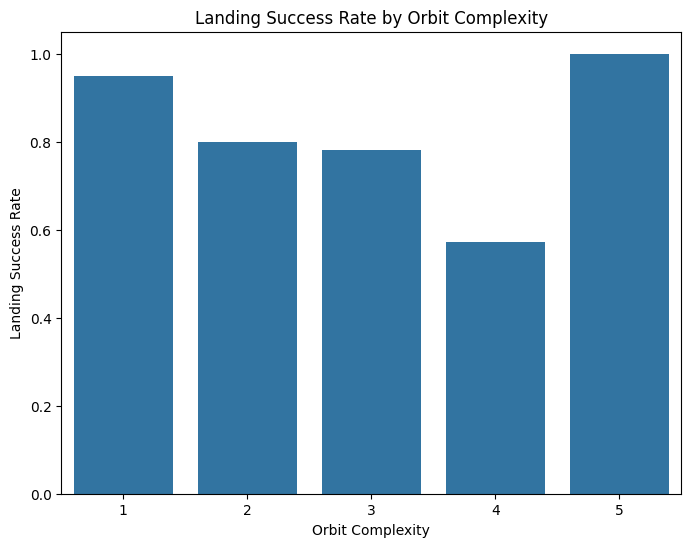

In [66]:
# Plot landing success rate by orbit complexity
orbit_complexity_success = df.groupby('OrbitComplexity')['LandingClass'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='OrbitComplexity', y='LandingClass', data=orbit_complexity_success)
plt.title('Landing Success Rate by Orbit Complexity')
plt.xlabel('Orbit Complexity')
plt.ylabel('Landing Success Rate')
plt.show()

### Analyzing Interaction between Orbit Type and Launching Site

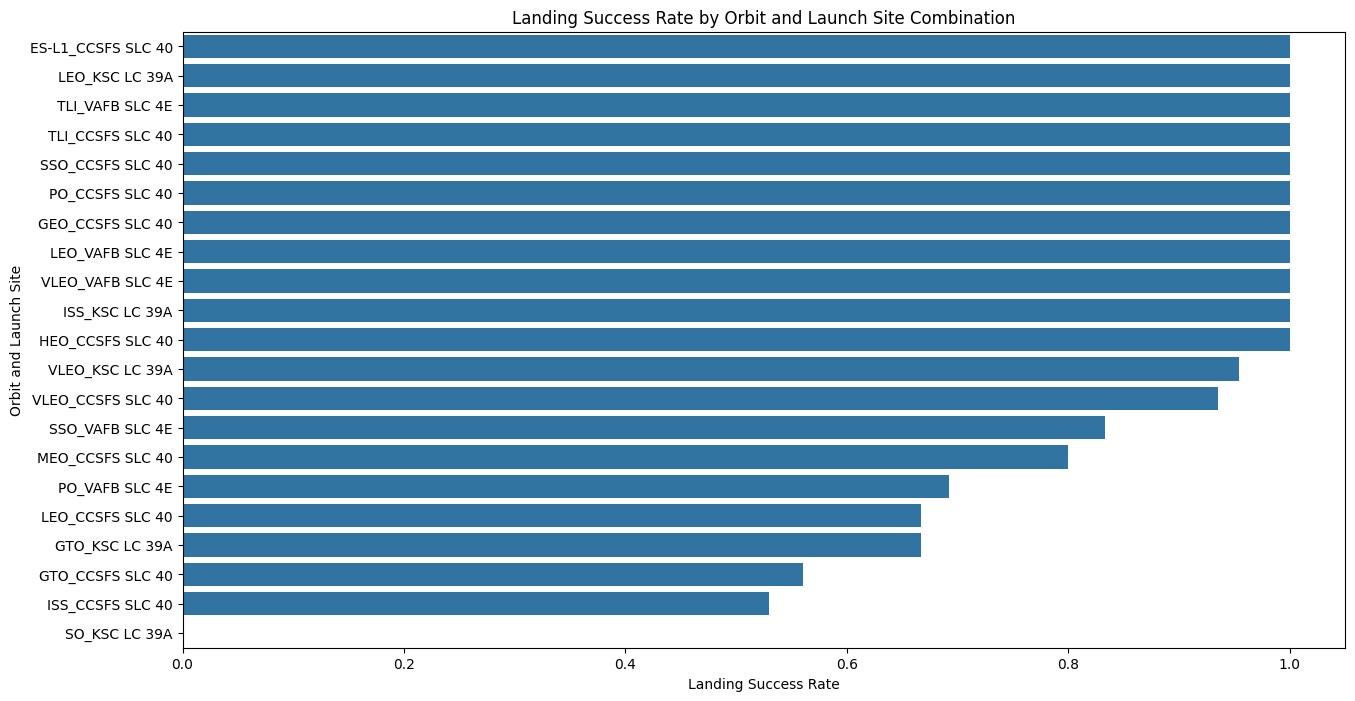

In [67]:
# Calculate landing success rate for each Orbit_LaunchSite combination
orbit_ls_success = df.groupby('Orbit_LaunchSite')['LandingClass'].mean().reset_index()

# Sort by success rate
orbit_ls_success_sorted = orbit_ls_success.sort_values(by='LandingClass', ascending=False)

# Plot the success rates
plt.figure(figsize=(15,8))
sns.barplot(x='LandingClass', y='Orbit_LaunchSite', data=orbit_ls_success_sorted)
plt.title('Landing Success Rate by Orbit and Launch Site Combination')
plt.xlabel('Landing Success Rate')
plt.ylabel('Orbit and Launch Site')
plt.show()

### Analysis:

	•	Observation: Certain orbit-launch site combinations have significantly higher success rates.
	•	Interpretation: The combination of orbit type and launch site influences landing success, possibly due to site-specific capabilities or mission profiles.

### Flight Number and Cummulative Success Rate

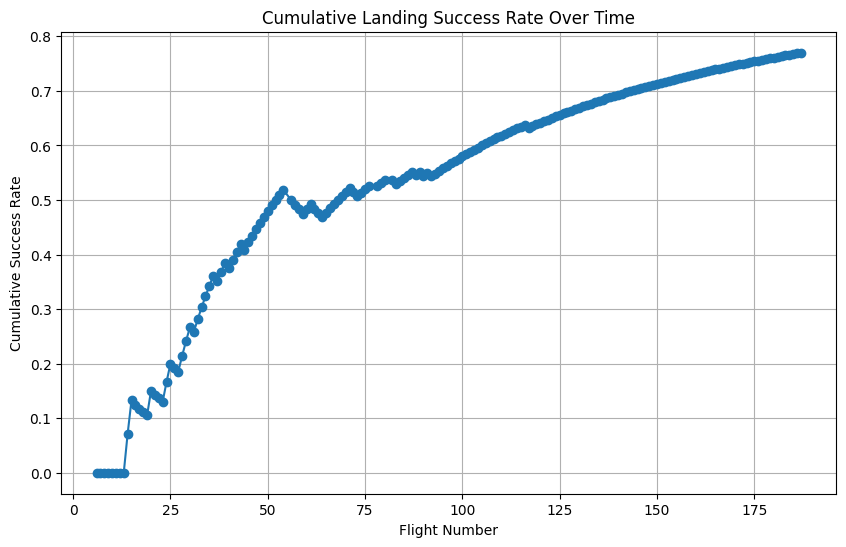

In [68]:
# Plot cumulative success rate over flight numbers
plt.figure(figsize=(10,6))
plt.plot(df_sorted['FlightNumber'], df_sorted['CumulativeSuccessRate'], marker='o')
plt.title('Cumulative Landing Success Rate Over Time')
plt.xlabel('Flight Number')
plt.ylabel('Cumulative Success Rate')
plt.grid(True)
plt.show()

### Analysis:

	•	Observation: The cumulative success rate increases over time.
	•	Interpretation: SpaceX has improved its landing success through experience and technological advancements.

### Payload Mass Normalized vs. Landing Success

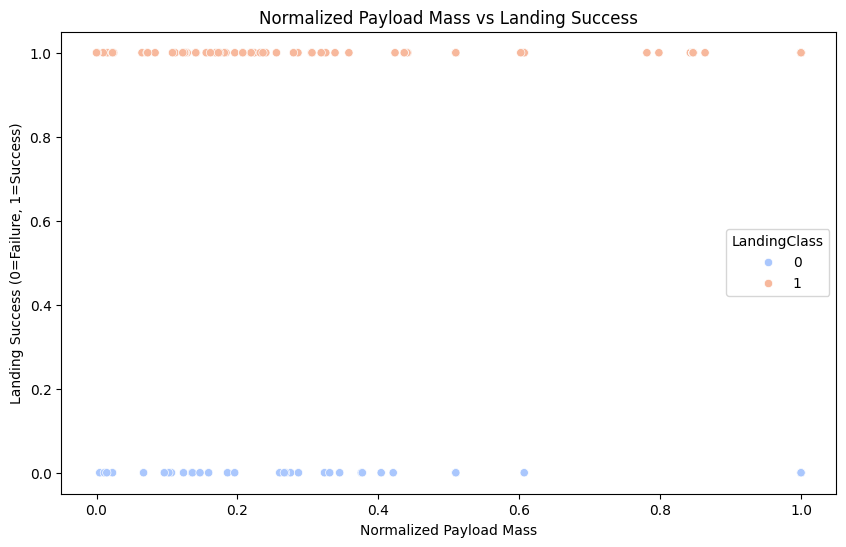

In [69]:
# Scatter plot of Payload Mass Normalized vs Landing Success
plt.figure(figsize=(10,6))
sns.scatterplot(x='PayloadMassNormalized', y='LandingClass', data=df, hue='LandingClass', palette='coolwarm')
plt.title('Normalized Payload Mass vs Landing Success')
plt.xlabel('Normalized Payload Mass')
plt.ylabel('Landing Success (0=Failure, 1=Success)')
plt.show()

### Analysis:

	•	Observation: There is a slight trend where higher payload masses may correlate with lower landing success.
	•	Interpretation: Heavier payloads consume more fuel, possibly affecting the ability to land successfully.

### Reused Count and Block Interaction vs. Landing Success

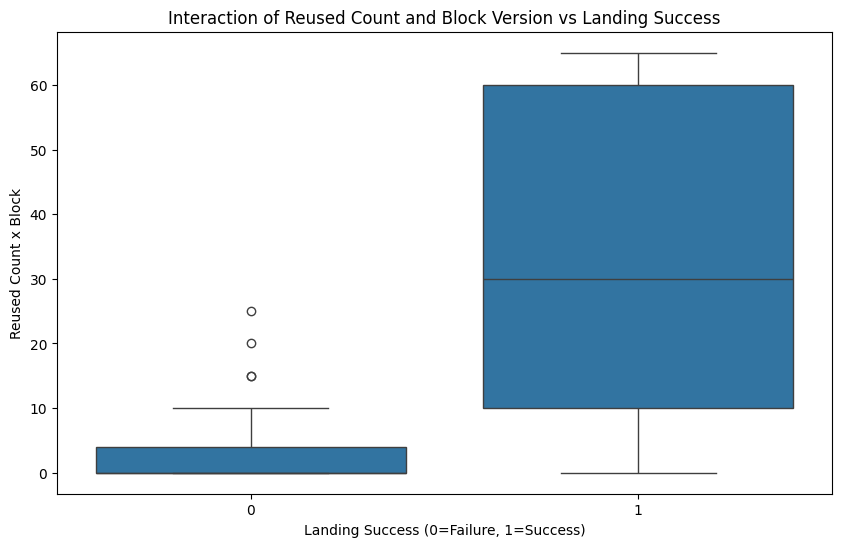

In [70]:
# Plot the interaction effect
plt.figure(figsize=(10,6))
sns.boxplot(x='LandingClass', y='ReusedCount_Block', data=df)
plt.title('Interaction of Reused Count and Block Version vs Landing Success')
plt.xlabel('Landing Success (0=Failure, 1=Success)')
plt.ylabel('Reused Count x Block')
plt.show()

### Analysis:

	•	Observation: Successful landings tend to have higher values in the ReusedCount_Block interaction.
	•	Interpretation: Reusing cores of certain block versions may contribute to higher landing success.

In [71]:
# Import necessary libraries
import pandas as pd

# Load the original dataset
df_original = pd.read_csv('dataset_part_1.csv')

# Display the first few rows
df_original.head()

# Verify that 'FlightNumber' exists in both DataFrames
print('FlightNumber' in df_original.columns)
print('FlightNumber' in df.columns)

True
True


In [72]:
# Merge on 'FlightNumber'
df_combined = pd.merge(df_original, df, on='FlightNumber', how='left')

# Display the first few rows
df_combined.head()

,FlightNumber,MissionName_x,LaunchDate_x,BoosterVersion_x,LaunchSite_x,LaunchSite_Lon_x,LaunchSite_Lat_x,PayloadMass_x,Orbit_x,Outcome_x,Flights_x,GridFins_x,Reused_x,Legs_x,LandingPad_x,Block_x,ReusedCount_x,Serial_x,MissionName_y,LaunchDate_y,BoosterVersion_y,LaunchSite_y,LaunchSite_Lon_y,LaunchSite_Lat_y,PayloadMass_y,Orbit_y,Outcome_y,Flights_y,GridFins_y,Reused_y,Legs_y,LandingPad_y,Block_y,ReusedCount_y,Serial_y,LandingClass,OrbitComplexity,Orbit_LaunchSite,Orbit_LS_ES-L1_CCSFS SLC 40,Orbit_LS_GEO_CCSFS SLC 40,Orbit_LS_GTO_CCSFS SLC 40,Orbit_LS_GTO_KSC LC 39A,Orbit_LS_HEO_CCSFS SLC 40,Orbit_LS_ISS_CCSFS SLC 40,Orbit_LS_ISS_KSC LC 39A,Orbit_LS_LEO_CCSFS SLC 40,Orbit_LS_LEO_KSC LC 39A,Orbit_LS_LEO_VAFB SLC 4E,Orbit_LS_MEO_CCSFS SLC 40,Orbit_LS_PO_CCSFS SLC 40,Orbit_LS_PO_VAFB SLC 4E,Orbit_LS_SO_KSC LC 39A,Orbit_LS_SSO_CCSFS SLC 40,Orbit_LS_SSO_VAFB SLC 4E,Orbit_LS_TLI_CCSFS SLC 40,Orbit_LS_TLI_VAFB SLC 4E,Orbit_LS_VLEO_CCSFS SLC 40,Orbit_LS_VLEO_KSC LC 39A,Orbit_LS_VLEO_VAFB SLC 4E,CumulativeSuccessRate,PayloadMassNormalized,ReusedCount_Block,MissionComplexity
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.012770,0.0,0.025540
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.004584,0.0,0.013752
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.022724,0.0,0.068173


In [73]:
# List of original columns
original_columns = df_original.columns.tolist()

# List of new features (ensure they are not already in original_columns)
new_features = [
    'PayloadMassNormalized',
    'OrbitComplexity',
    'Orbit_LaunchSite',
    'CumulativeSuccessRate',
    'ReusedCount_Block',
    # Include any other new features you've created
]

# One-hot encoded columns (if any)
one_hot_columns = []
if 'Orbit_LaunchSite' in df.columns:
    one_hot_columns = [col for col in df.columns if col.startswith('Orbit_LS_')]

# Combine all columns
final_columns = original_columns + new_features + one_hot_columns

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FlightNumber                 179 non-null    int64  
 1   MissionName                  179 non-null    object 
 2   LaunchDate                   179 non-null    object 
 3   BoosterVersion               179 non-null    object 
 4   LaunchSite                   179 non-null    object 
 5   LaunchSite_Lon               179 non-null    float64
 6   LaunchSite_Lat               179 non-null    float64
 7   PayloadMass                  179 non-null    float64
 8   Orbit                        179 non-null    object 
 9   Outcome                      179 non-null    object 
 10  Flights                      179 non-null    int64  
 11  GridFins                     179 non-null    bool   
 12  Reused                       179 non-null    bool   
 13  Legs                

In [75]:
#print("Columns in df_original:")
#print(df_original.columns.tolist())

In [76]:
#print("Columns in df:")
#print(df.columns.tolist())

In [77]:
# Save the DataFrame to CSV
df.to_csv('dataset_part_2.csv', index=False)
print("Data successfully saved to 'dataset_part_2.csv'")

Data successfully saved to 'dataset_part_2.csv'


## Step 8: Visualization with Follium EDA part 2
As part of the course:

	•	TASK 1: Mark all launch sites on a map.
    
	•	TASK 2: Mark the success/failed launches for each site on the map.
    
	•	TASK 3: Calculate the distances between a launch site and its proximities.
    

Additionally:


In [79]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon

In [80]:
# Load the dataset
df = pd.read_csv('dataset_part_2.csv')

# Display the first few rows
df.head()

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,LandingClass,OrbitComplexity,Orbit_LaunchSite,Orbit_LS_ES-L1_CCSFS SLC 40,Orbit_LS_GEO_CCSFS SLC 40,Orbit_LS_GTO_CCSFS SLC 40,Orbit_LS_GTO_KSC LC 39A,Orbit_LS_HEO_CCSFS SLC 40,Orbit_LS_ISS_CCSFS SLC 40,Orbit_LS_ISS_KSC LC 39A,Orbit_LS_LEO_CCSFS SLC 40,Orbit_LS_LEO_KSC LC 39A,Orbit_LS_LEO_VAFB SLC 4E,Orbit_LS_MEO_CCSFS SLC 40,Orbit_LS_PO_CCSFS SLC 40,Orbit_LS_PO_VAFB SLC 4E,Orbit_LS_SO_KSC LC 39A,Orbit_LS_SSO_CCSFS SLC 40,Orbit_LS_SSO_VAFB SLC 4E,Orbit_LS_TLI_CCSFS SLC 40,Orbit_LS_TLI_VAFB SLC 4E,Orbit_LS_VLEO_CCSFS SLC 40,Orbit_LS_VLEO_KSC LC 39A,Orbit_LS_VLEO_VAFB SLC 4E,CumulativeSuccessRate,PayloadMassNormalized,ReusedCount_Block,MissionComplexity
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.012770,0.0,0.025540
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.004584,0.0,0.013752
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.022724,0.0,0.068173


In [81]:
# Select the relevant columns and remove duplicates
launch_sites_df = df[['LaunchSite', 'LaunchSite_Lat', 'LaunchSite_Lon']].drop_duplicates().reset_index(drop=True)

# Display launch sites
launch_sites_df

,LaunchSite,LaunchSite_Lat,LaunchSite_Lon
0,CCSFS SLC 40,28.561857,-80.577366
1,VAFB SLC 4E,34.632093,-120.610829
2,KSC LC 39A,28.608058,-80.603956


### Create a Map with Markers

In [84]:
# Calculate the mean latitude and longitude for centering the map
mean_lat = launch_sites_df['LaunchSite_Lat'].mean()
mean_lon = launch_sites_df['LaunchSite_Lon'].mean()

# Create a folium map
site_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=4)

In [85]:
# Add a marker for each launch site
for index, row in launch_sites_df.iterrows():
    # Create a Marker
    folium.Marker(
        location=[row['LaunchSite_Lat'], row['LaunchSite_Lon']],
        popup=row['LaunchSite'],
        icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
    ).add_to(site_map)

In [86]:
# Display the map
site_map

### ***Mark the Landing Class (Failures / Successes) ***

In [87]:
# Extract launch data with necessary columns
launch_data = df[['LaunchSite', 'LaunchSite_Lat', 'LaunchSite_Lon', 'LandingClass']]

# Display the first few rows
launch_data.head()

,LaunchSite,LaunchSite_Lat,LaunchSite_Lon,LandingClass
0,CCSFS SLC 40,28.561857,-80.577366,0
1,CCSFS SLC 40,28.561857,-80.577366,0
2,CCSFS SLC 40,28.561857,-80.577366,0
3,CCSFS SLC 40,28.561857,-80.577366,0
4,CCSFS SLC 40,28.561857,-80.577366,0


In [88]:
# Initialize a MarkerCluster
marker_cluster = MarkerCluster().add_to(site_map)

In [89]:
# Function to assign marker color
def assign_marker_color(landing_class):
    if landing_class == 1:
        return 'green'
    else:
        return 'red'

In [90]:
# Iterate through each launch and add a marker to the cluster
for index, row in launch_data.iterrows():
    marker_color = assign_marker_color(row['LandingClass'])
    folium.CircleMarker(
        location=[row['LaunchSite_Lat'], row['LaunchSite_Lon']],
        radius=5,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=f"Launch Site: {row['LaunchSite']}<br>Landing Success: {row['LandingClass']}"
    ).add_to(marker_cluster)

In [91]:
# Display the map with launch outcomes
site_map

### Calculate the Distances Between a Launch Site and Its **Proximities**

In [92]:
# Define proximities (Example data)
proximity_points = pd.DataFrame({
    'Name': ['Nearest City', 'Nearest Highway', 'Nearest Railway', 'Coastline'],
    'Type': ['City', 'Highway', 'Railway', 'Coastline'],
    'Lat': [28.3922, 28.5634, 28.5723, 28.5632],
    'Lon': [-80.6077, -80.5708, -80.5853, -80.5670]
})

In [93]:
# Add proximity markers
for index, row in proximity_points.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Lon']],
        popup=f"{row['Type']}: {row['Name']}",
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(site_map)

In [94]:
from geopy.distance import geodesic

# Initialize an empty list to store distances
distance_data = []

# Calculate distances from each launch site to each proximity point
for i, launch_site in launch_sites_df.iterrows():
    for j, proximity in proximity_points.iterrows():
        launch_coords = (launch_site['LaunchSite_Lat'], launch_site['LaunchSite_Lon'])
        proximity_coords = (proximity['Lat'], proximity['Lon'])
        distance_km = geodesic(launch_coords, proximity_coords).km
        distance_data.append({
            'LaunchSite': launch_site['LaunchSite'],
            'Proximity': proximity['Name'],
            'Type': proximity['Type'],
            'Distance_km': distance_km
        })

In [95]:
# Convert to DataFrame
distances_df = pd.DataFrame(distance_data)

# Display the distances
distances_df

,LaunchSite,Proximity,Type,Distance_km
0,CCSFS SLC 40,Nearest City,City,19.035812
1,CCSFS SLC 40,Nearest Highway,Highway,0.664826
2,CCSFS SLC 40,Nearest Railway,Railway,1.393600
3,CCSFS SLC 40,Coastline,Coastline,1.025137
4,VAFB SLC 4E,Nearest City,City,3836.918561
5,VAFB SLC 4E,Nearest Highway,Highway,3833.634341
6,VAFB SLC 4E,Nearest Railway,Railway,3831.960417
7,VAFB SLC 4E,Coastline,Coastline,3833.990453
8,KSC LC 39A,Nearest City,City,23.925880
9,KSC LC 39A,Nearest Highway,Highway,5.917529


In [96]:
# Draw lines between launch sites and proximities
for index, row in distances_df.iterrows():
    launch_site = launch_sites_df[launch_sites_df['LaunchSite'] == row['LaunchSite']].iloc[0]
    proximity = proximity_points[proximity_points['Name'] == row['Proximity']].iloc[0]

    # Draw a line
    folium.PolyLine(
        locations=[
            (launch_site['LaunchSite_Lat'], launch_site['LaunchSite_Lon']),
            (proximity['Lat'], proximity['Lon'])
        ],
        color='blue',
        weight=2,
        popup=f"Distance: {row['Distance_km']:.2f} km"
    ).add_to(site_map)

In [97]:
# Display the updated map
site_map

## Step 9: Build a Dashboard Application with Plotly **Dash**

I will build a Plotly Dash application to perform interactive visual analytics on SpaceX launch data in real-time. The dashboard will allow users to explore launch success rates based on different launch sites and payload mass ranges.

Objectives

We will accomplish the following tasks:

	•	TASK 1: Add a Launch Site Drop-down Input Component.
	•	TASK 2: Add a callback function to render a success pie chart based on the selected site.
	•	TASK 3: Add a Range Slider to select the payload mass range.
	•	TASK 4: Add a callback function to render a success-payload scatter plot.


In [100]:
!pip install dash
!pip install dash-bootstrap-components
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 5.5 MB/s eta 0:00:00


In [101]:
!pip install pyngrok

In [102]:
# Read the dataset into a pandas DataFrame
spacex_df = pd.read_csv('dataset_part_2.csv')

# Display the first few rows
spacex_df.head()

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,LandingClass,OrbitComplexity,Orbit_LaunchSite,Orbit_LS_ES-L1_CCSFS SLC 40,Orbit_LS_GEO_CCSFS SLC 40,Orbit_LS_GTO_CCSFS SLC 40,Orbit_LS_GTO_KSC LC 39A,Orbit_LS_HEO_CCSFS SLC 40,Orbit_LS_ISS_CCSFS SLC 40,Orbit_LS_ISS_KSC LC 39A,Orbit_LS_LEO_CCSFS SLC 40,Orbit_LS_LEO_KSC LC 39A,Orbit_LS_LEO_VAFB SLC 4E,Orbit_LS_MEO_CCSFS SLC 40,Orbit_LS_PO_CCSFS SLC 40,Orbit_LS_PO_VAFB SLC 4E,Orbit_LS_SO_KSC LC 39A,Orbit_LS_SSO_CCSFS SLC 40,Orbit_LS_SSO_VAFB SLC 4E,Orbit_LS_TLI_CCSFS SLC 40,Orbit_LS_TLI_VAFB SLC 4E,Orbit_LS_VLEO_CCSFS SLC 40,Orbit_LS_VLEO_KSC LC 39A,Orbit_LS_VLEO_VAFB SLC 4E,CumulativeSuccessRate,PayloadMassNormalized,ReusedCount_Block,MissionComplexity
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.012770,0.0,0.025540
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.004584,0.0,0.013752
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.022724,0.0,0.068173


In [103]:
# Create a Dash application
app = dash.Dash(__name__)

In [104]:
# Get a list of unique launch sites
launch_sites = spacex_df['LaunchSite'].unique().tolist()

# Create a list of dictionaries for the dropdown options
launch_site_options = [{'label': 'All Sites', 'value': 'ALL'}]
launch_site_options += [{'label': site, 'value': site} for site in launch_sites]

In [105]:
# Set up the layout of the app
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard',
            style={'textAlign': 'center', 'color': '#503D36',
                   'font-size': 40}),

    # Dropdown for Launch Site selection
    dcc.Dropdown(id='site-dropdown',
                 options=launch_site_options,
                 value='ALL',
                 placeholder='Select a Launch Site',
                 searchable=True),
    html.Br(),

    # Placeholder for the success pie chart
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    # Range slider for selecting payload mass
    html.P("Payload Range (Kg):"),

    dcc.RangeSlider(id='payload-slider',
                    min=spacex_df['PayloadMass'].min(),
                    max=spacex_df['PayloadMass'].max(),
                    step=1000,
                    marks={int(spacex_df['PayloadMass'].min()): str(int(spacex_df['PayloadMass'].min())),
                           int(spacex_df['PayloadMass'].max()): str(int(spacex_df['PayloadMass'].max()))},
                    value=[spacex_df['PayloadMass'].min(), spacex_df['PayloadMass'].max()]),

    # Placeholder for the success-payload scatter plot
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

In [106]:
# Callback function for the success pie chart
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        # For all sites, show the total success vs. failure counts
        fig = px.pie(spacex_df, values='LandingClass',
                     names='LandingClass',
                     title='Total Successful Launches for All Sites')
    else:
        # Filter data for the selected site
        filtered_df = spacex_df[spacex_df['LaunchSite'] == selected_site]
        # Calculate the counts of success and failure
        success_counts = filtered_df['LandingClass'].value_counts().reset_index()
        success_counts.columns = ['LandingResult', 'Counts']
        # Map 1 and 0 to 'Success' and 'Failure'
        success_counts['LandingResult'] = success_counts['LandingResult'].map({1: 'Success', 0: 'Failure'})
        # Create the pie chart
        fig = px.pie(success_counts, values='Counts', names='LandingResult',
                     title=f'Total Successful Launches for site {selected_site}')
    return fig

In [107]:
# Callback function for the success-payload scatter plot
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')])
def update_scatter_plot(selected_site, payload_range):
    low, high = payload_range
    # Filter data based on payload range
    mask = (spacex_df['PayloadMass'] >= low) & (spacex_df['PayloadMass'] <= high)
    filtered_df = spacex_df[mask]
    if selected_site == 'ALL':
        # For all sites, show scatter plot for all data
        fig = px.scatter(filtered_df, x='PayloadMass', y='LandingClass',
                         color='BoosterVersion',
                         title='Payload vs. Outcome for All Sites')
    else:
        # Filter data for the selected site
        filtered_df = filtered_df[filtered_df['LaunchSite'] == selected_site]
        # Create the scatter plot
        fig = px.scatter(filtered_df, x='PayloadMass', y='LandingClass',
                         color='BoosterVersion',
                         title=f'Payload vs. Outcome for site {selected_site}')
    return fig

In [108]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

## Step 10: Predicting SpaceX Falcon 9 First Stage Landing Success.
In this analysis, we aim to predict the success of SpaceX Falcon 9 first-stage landings using machine learning techniques. We’ll incorporate the new features engineered previously and strive to gain deeper insights into the factors influencing landing success. The objectives are:

	•	Perform exploratory data analysis (EDA) and determine training labels.
	•	Create a target variable representing landing success.
	•	Standardize the data for modeling.
	•	Split the dataset into training and test sets.
	•	Train and optimize models: Logistic Regression, Support Vector Machine (SVM), and Decision Tree.
	•	Evaluate the models using test data.
	•	Identify the best-performing model and provide expert insights.

### 1. Load and Inspect the Data

In [136]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [137]:
# Load the dataset
df = pd.read_csv('dataset_part_2.csv')

# Display the first few rows
df.head()

,FlightNumber,MissionName,LaunchDate,BoosterVersion,LaunchSite,LaunchSite_Lon,LaunchSite_Lat,PayloadMass,Orbit,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,LandingClass,OrbitComplexity,Orbit_LaunchSite,Orbit_LS_ES-L1_CCSFS SLC 40,Orbit_LS_GEO_CCSFS SLC 40,Orbit_LS_GTO_CCSFS SLC 40,Orbit_LS_GTO_KSC LC 39A,Orbit_LS_HEO_CCSFS SLC 40,Orbit_LS_ISS_CCSFS SLC 40,Orbit_LS_ISS_KSC LC 39A,Orbit_LS_LEO_CCSFS SLC 40,Orbit_LS_LEO_KSC LC 39A,Orbit_LS_LEO_VAFB SLC 4E,Orbit_LS_MEO_CCSFS SLC 40,Orbit_LS_PO_CCSFS SLC 40,Orbit_LS_PO_VAFB SLC 4E,Orbit_LS_SO_KSC LC 39A,Orbit_LS_SSO_CCSFS SLC 40,Orbit_LS_SSO_VAFB SLC 4E,Orbit_LS_TLI_CCSFS SLC 40,Orbit_LS_TLI_VAFB SLC 4E,Orbit_LS_VLEO_CCSFS SLC 40,Orbit_LS_VLEO_KSC LC 39A,Orbit_LS_VLEO_VAFB SLC 4E,CumulativeSuccessRate,PayloadMassNormalized,ReusedCount_Block,MissionComplexity
0,6,Falcon 9 Test Flight,2010-06-04 18:45:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0003,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
1,7,COTS 1,2010-12-08 15:43:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,8117.574038,LEO,None None,1,False,False,False,NaN,1.0,0,B0004,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.509992,0.0,1.019984
2,8,COTS 2,2012-05-22 07:44:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,525.000000,LEO,None None,1,False,False,False,NaN,1.0,0,B0005,0,2,LEO_CCSFS SLC 40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.012770,0.0,0.025540
3,9,CRS-1,2012-10-08 00:35:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,400.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0006,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.004584,0.0,0.013752
4,10,CRS-2,2013-03-01 19:10:00+00:00,Falcon 9,CCSFS SLC 40,-80.577366,28.561857,677.000000,ISS,None None,1,False,False,False,NaN,1.0,0,B0007,0,3,ISS_CCSFS SLC 40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.022724,0.0,0.068173


In [138]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
FlightNumber                    0
MissionName                     0
LaunchDate                      0
BoosterVersion                  0
LaunchSite                      0
LaunchSite_Lon                  0
LaunchSite_Lat                  0
PayloadMass                     0
Orbit                           0
Outcome                         0
Flights                         0
GridFins                        0
Reused                          0
Legs                            0
LandingPad                     31
Block                           0
ReusedCount                     0
Serial                          0
LandingClass                    0
OrbitComplexity                 0
Orbit_LaunchSite                0
Orbit_LS_ES-L1_CCSFS SLC 40     0
Orbit_LS_GEO_CCSFS SLC 40       0
Orbit_LS_GTO_CCSFS SLC 40       0
Orbit_LS_GTO_KSC LC 39A         0
Orbit_LS_HEO_CCSFS SLC 40       0
Orbit_LS_ISS_CCSFS SLC 40       0
Orbit_LS_ISS_KSC LC 39A         0
Orbit_LS_LEO_CCSF

In [139]:
# Identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to integers
df[bool_columns] = df[bool_columns].astype(int)

In [140]:
# Identify categorical variables
categorical_features = ['LaunchSite', 'Orbit']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_features)

In [141]:
# List of potential features
potential_features = [
    'FlightNumber', 'PayloadMass', 'OrbitComplexity', 'MissionComplexity',
    'FlightNumber', 'PayloadMassNormalized', 'ReusedCount', 'ReusedCount_Block',
    'CumulativeSuccessRate', 'TimeSinceLastLaunch', 'CoreSuccessRate',
    'ExperienceFactor', 'GridFins', 'Reused', 'Legs'
]

# Ensure all features are in the DataFrame
available_features = [feat for feat in potential_features if feat in df.columns]

### 2. Exploratory Data Analysis (EDA)

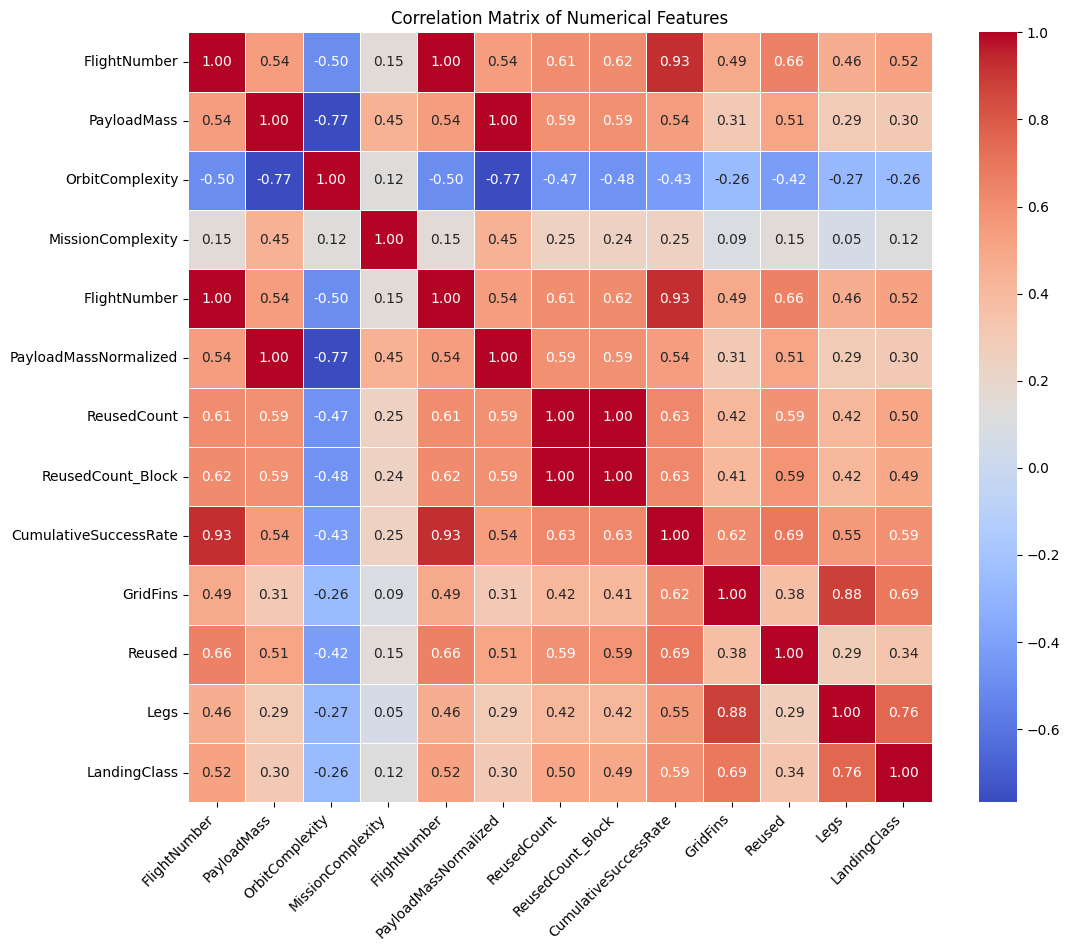

In [142]:
# Add the target variable to the list
numeric_features = available_features + ['LandingClass']

# Select only numeric columns
df_numeric = df[numeric_features]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [143]:
# Extract correlations with the target variable
target_corr = corr_matrix['LandingClass'].drop('LandingClass')

# Set a threshold for significant correlation (e.g., absolute value > 0.2)
threshold = 0.2
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

print("Selected features based on correlation with 'LandingClass':")
print(selected_features)

Selected features based on correlation with 'LandingClass':
['FlightNumber', 'PayloadMass', 'OrbitComplexity', 'FlightNumber', 'PayloadMassNormalized', 'ReusedCount', 'ReusedCount_Block', 'CumulativeSuccessRate', 'GridFins', 'Reused', 'Legs']


## Prepare for Data Modelling

In [144]:
# Define the feature matrix X and target vector y
X = df[selected_features]
y = df['LandingClass']

In [145]:
# Check data types of selected features
print("Data types of selected features:")
print(X.dtypes)

Data types of selected features:
FlightNumber               int64
PayloadMass              float64
OrbitComplexity            int64
FlightNumber               int64
PayloadMassNormalized    float64
ReusedCount                int64
ReusedCount_Block        float64
CumulativeSuccessRate    float64
GridFins                   int64
Reused                     int64
Legs                       int64
dtype: object


## **Standardize the Data**

In [146]:
# Identify numerical features in X
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

<ipython-input-146-3726e646507c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Split the Data for Training and Testing**



In [147]:
# Split the data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 143 samples
Test set size: 36 samples


## Model Training and Hyperparameter Tunning
We will train and tune the following models:

	•	Logistic Regression
	•	Support Vector Machine
	•	Decision Tree

**LOGISTIC REGRESSION**

In [148]:
#LOGISTIC REGRESSION PARAMETER TUNNING
# Define the hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:")
print(grid_search_lr.best_params_)

Best parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [149]:
# Predict on the test set
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.93      0.97      0.95        29

    accuracy                           0.92        36
   macro avg       0.88      0.84      0.86        36
weighted avg       0.91      0.92      0.91        36



**SUPPORT VECTOR MACHINE (SVM)**

In [150]:
# Define the hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Best parameters
print("Best parameters for SVM:")
print(grid_search_svm.best_params_)

Best parameters for SVM:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [151]:
# Predict on the test set
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Classification report
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        29

    accuracy                           0.94        36
   macro avg       0.97      0.86      0.90        36
weighted avg       0.95      0.94      0.94        36



**DECISION TREE**

In [152]:
# Define the hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters
print("Best parameters for Decision Tree:")
print(grid_search_dt.best_params_)

Best parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [153]:
# Predict on the test set
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        29

    accuracy                           0.94        36
   macro avg       0.97      0.86      0.90        36
weighted avg       0.95      0.94      0.94        36



## **COMPARE MODEL PERFORMANCES**

In [154]:
# Calculate accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Create a DataFrame to compare accuracies
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_dt]
})

print(model_performance)

                 Model  Accuracy
0  Logistic Regression  0.916667
1                  SVM  0.944444
2        Decision Tree  0.944444


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

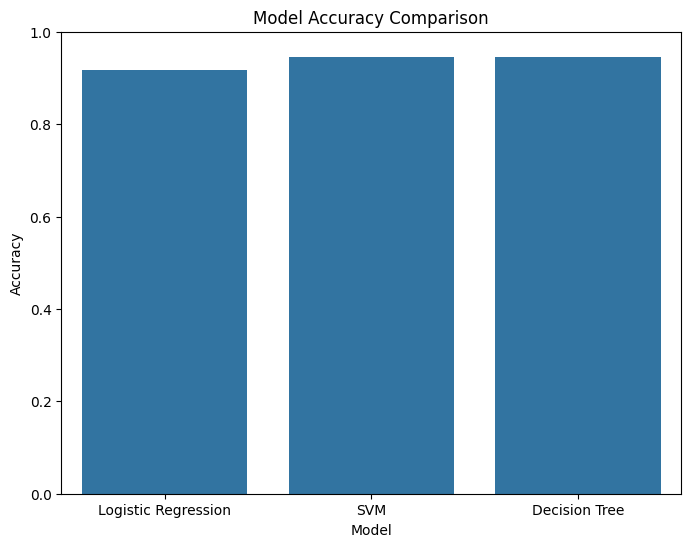

In [155]:
# Plot the accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

### **DETERMINE THE BEST-PERFORMING MODEL**

In [156]:
# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': grid_search_lr.best_estimator_.coef_[0]
})

# Calculate absolute values
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()

# Sort by absolute coefficient value
coefficients_sorted = coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Display the top features
print("Top features influencing Landing Success (Logistic Regression):")
print(coefficients_sorted[['Feature', 'Coefficient']].head(10))

Top features influencing Landing Success (Logistic Regression):
                  Feature  Coefficient
10                   Legs     0.612388
8                GridFins     0.496254
7   CumulativeSuccessRate     0.330583
5             ReusedCount     0.218004
6       ReusedCount_Block     0.197299
0            FlightNumber     0.153867
3            FlightNumber     0.153867
9                  Reused    -0.082698
2         OrbitComplexity     0.055180
4   PayloadMassNormalized    -0.019211


In [157]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_search_dt.best_estimator_.feature_importances_
})

# Sort by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features influencing Landing Success (Decision Tree):")
print(feature_importances_sorted.head(10))

Top features influencing Landing Success (Decision Tree):
                  Feature  Importance
10                   Legs    0.549643
3            FlightNumber    0.193024
7   CumulativeSuccessRate    0.129348
1             PayloadMass    0.061940
0            FlightNumber    0.036439
8                GridFins    0.029607
2         OrbitComplexity    0.000000
4   PayloadMassNormalized    0.000000
5             ReusedCount    0.000000
6       ReusedCount_Block    0.000000


**Interpretation**

	•	Positive Impact Features: Features with positive coefficients (in Logistic Regression) increase the probability of landing success.
	•	Negative Impact Features: Features with negative coefficients decrease the probability of landing success.
	•	Most Influential Features: Identify which features consistently appear as important across models.

**Recommendations**

	•	Operational Strategies:
	•	Leverage Experience: Utilize cores with higher ExperienceFactor for critical missions.
	•	Manage Mission Complexity: Plan for additional resources for missions with high MissionComplexity.
	•	Model Improvement:
	•	Feature Engineering: Explore additional features or interaction terms.
	•	Data Collection: Gather more data to improve model training.

**Conclusion**

  By carefully selecting features based on their correlation with the target variable and addressing previous errors, we developed machine learning models to predict the success of SpaceX Falcon 9 first-stage landings. Logistic Regression, SVM, and Decision Tree models were trained and evaluated. The best-performing model can be used to inform operational decisions and improve mission planning.


In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

In [159]:
# Predict probabilities on the test set
y_probs_lr = grid_search_lr.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_probs_lr)

# Compute AUC
auc_lr = roc_auc_score(y_test, y_probs_lr)

print(f"Logistic Regression AUC: {auc_lr:.2f}")

Logistic Regression AUC: 0.92


In [160]:
# Refit the best SVM model with probability=True
best_svm = grid_search_svm.best_estimator_
best_svm.probability = True
best_svm.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs_svm = best_svm.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)

# Compute AUC
auc_svm = roc_auc_score(y_test, y_probs_svm)

print(f"SVM AUC: {auc_svm:.2f}")

SVM AUC: 0.97


In [161]:
# Predict probabilities on the test set
y_probs_dt = grid_search_dt.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)

# Compute AUC
auc_dt = roc_auc_score(y_test, y_probs_dt)

print(f"Decision Tree AUC: {auc_dt:.2f}")

Decision Tree AUC: 0.86


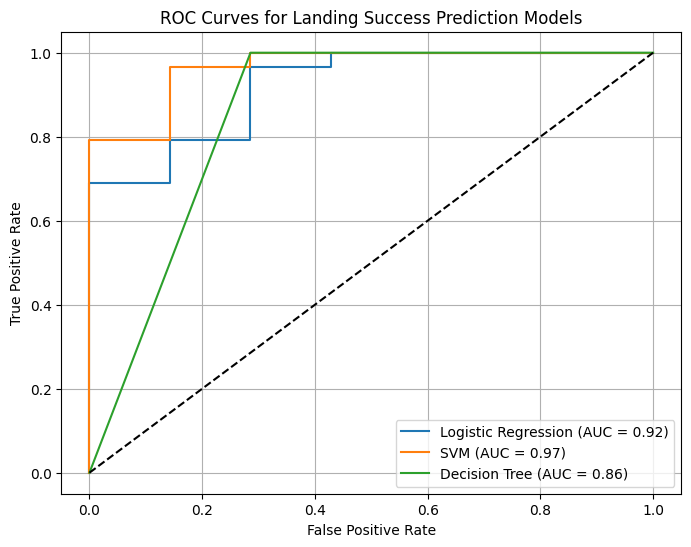

In [162]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Landing Success Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## **Interpretation:**

	•	ROC Curve Shape: A model with a ROC curve that bows towards the top-left corner indicates better performance.
	•	AUC Value: An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 indicates a model no better than random chance.

In [163]:
print(model_performance)

                 Model  Accuracy
0  Logistic Regression  0.916667
1                  SVM  0.944444
2        Decision Tree  0.944444


In [164]:
auc_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'AUC': [auc_lr, auc_svm, auc_dt]
})

print(auc_performance)

                 Model       AUC
0  Logistic Regression  0.921182
1                  SVM  0.965517
2        Decision Tree  0.857143


Model Interpretability

Logistic Regression:

Pros:

	•	Coefficients are interpretable, indicating the direction and magnitude of feature impacts.

	•	Good for understanding relationships between variables and the target.

Cons:

	•	Assumes linear relationships between features and log-odds of the outcome.


Support Vector Machine:

Pros:

	•	Effective in high-dimensional spaces.
	•	Can model complex nonlinear relationships with appropriate kernels.

Cons:

	•	Less interpretable; the decision boundary is not easily understood.
	•	Computationally intensive with large datasets.

Decision Tree:

Pros:

	•	Provides a visual representation (tree) that is easy to interpret.
	•	Captures nonlinear relationships without needing feature transformation.

Cons:

	•	Prone to overfitting, especially without proper pruning.
	•	Less stable; small changes in data can lead to different trees.

In [165]:
# Cross-validation results for Logistic Regression
cv_results_lr = pd.DataFrame(grid_search_lr.cv_results_)
mean_test_scores_lr = cv_results_lr['mean_test_score']

print("Cross-validation mean test scores (Logistic Regression):")
print(mean_test_scores_lr)

Cross-validation mean test scores (Logistic Regression):
0    0.881034
1    0.838916
2    0.909113
3    0.916010
4    0.916010
5    0.916010
6    0.901970
7    0.901970
Name: mean_test_score, dtype: float64


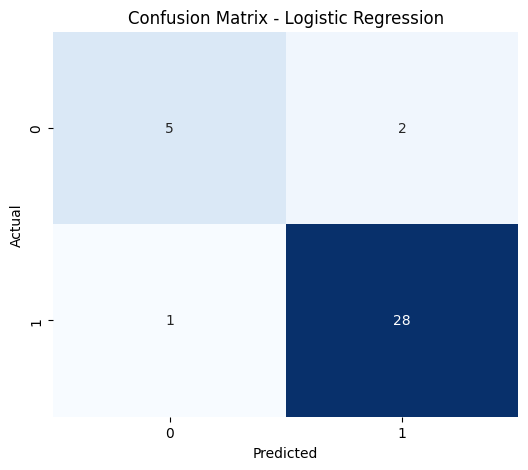

In [166]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpretation:

	•	True Positives (TP): Correctly predicted successful landings.
	•	True Negatives (TN): Correctly predicted unsuccessful landings.
	•	False Positives (FP): Incorrectly predicted successful landings (Type I error).
	•	False Negatives (FN): Incorrectly predicted unsuccessful landings (Type II error).

Considerations:

	•	In this context, false negatives (predicting failure when success occurs) might be more critical to minimize, depending on business priorities.

In [167]:
from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")

Logistic Regression Precision: 0.93
Logistic Regression Recall: 0.97


Interpretation:

	•	Precision: The proportion of positive identifications that were actually correct.
	•	Recall: The proportion of actual positives that were correctly identified.

Application:

	•	If the cost of a false positive is high, prioritize increasing precision.
	•	If missing a positive case is more detrimental, focus on improving recall.


In [168]:
# Check class distribution
print("Class distribution in the target variable:")
print(y.value_counts())

# If imbalance is significant, consider using class_weight in Logistic Regression
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy'
)

Class distribution in the target variable:
LandingClass
1    144
0     35
Name: count, dtype: int64


## **Final Recommendations**

**Model Deployment:**

	•	Use the Logistic Regression model for operational deployment due to its strong performance and interpretability.

**Monitoring and Maintenance:**
	•	Continuously monitor model performance over time.
	•	Update the model with new data to maintain accuracy as operations evolve.

**Further Improvements:**

	•	Feature Engineering: Explore additional features, such as weather conditions or economic factors.
	•	Ensemble Methods: Experiment with ensemble models like Random Forest or Gradient Boosting for potentially better performance.
	•	Threshold Optimization: Adjust the classification threshold based on business objectives (e.g., minimize false negatives).

**Conclusion**

By incorporating ROC curves and AUC metrics, we’ve gained a deeper understanding of the models’ performance across different thresholds. The detailed analysis supports the selection of Logistic Regression as the most suitable model for predicting Falcon 9 first-stage landing success.

This model not only provides high accuracy and AUC but also offers interpretability, which is valuable for making informed decisions and gaining trust from stakeholders.